In [1]:
library(dplyr)
library(stringr)
library(gridExtra)
library(ggcorrplot)
library(psych)
library(corrplot)
library(ggthemes)
library(Boruta)
library(car)
library(caret)
library(rstatix)
library(AID)
library(VIM)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Zorunlu paket yükleniyor: ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


corrplot 0.92 loaded

Zorunlu paket yükleniyor: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


Zorunlu paket yükleniyor: lattice


Attaching package: ‘rstatix’


The following object is masked from ‘package:ggcorrplot’:

    cor_pmat


The following object is masked from ‘package:stats’:

    filter


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Zorunlu paket yükleniyor: colors

In [2]:
setwd("/Users/mehmeterkan/Desktop/STAT 412/412 final proje")
data <- read.csv("salary.csv")
head(data)
str(data)
summary(data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [6]:
for (col in names(data)) {
  if (class(data[,col]) == "character") {
    cat("\n")
    cat(col, "\n")
    print(unique(data[,col]))
  }
}


workclass 
[1] " State-gov"        " Self-emp-not-inc" " Private"         
[4] " Federal-gov"      " Local-gov"        " ?"               
[7] " Self-emp-inc"     " Without-pay"      " Never-worked"    

education 
 [1] " Bachelors"    " HS-grad"      " 11th"         " Masters"     
 [5] " 9th"          " Some-college" " Assoc-acdm"   " Assoc-voc"   
 [9] " 7th-8th"      " Doctorate"    " Prof-school"  " 5th-6th"     
[13] " 10th"         " 1st-4th"      " Preschool"    " 12th"        

marital.status 
[1] " Never-married"         " Married-civ-spouse"    " Divorced"             
[4] " Married-spouse-absent" " Separated"             " Married-AF-spouse"    
[7] " Widowed"              

occupation 
 [1] " Adm-clerical"      " Exec-managerial"   " Handlers-cleaners"
 [4] " Prof-specialty"    " Other-service"     " Sales"            
 [7] " Craft-repair"      " Transport-moving"  " Farming-fishing"  
[10] " Machine-op-inspct" " Tech-support"      " ?"                
[13] " Protective-s

In [7]:
#Remove Extra Space
data <- data %>% 
  mutate_if(is.character, trimws)

In [8]:
data[data == "?"] <- NA

In [9]:
na_counts <- colSums(is.na(data))
na_counts

age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         salary 
             0              0              0            583              0

In [11]:
data$workclass <- data$workclass %>%
  str_replace_all("Federal-gov", "Government") %>%
  str_replace_all("Local-gov", "Government") %>%
  str_replace_all("Self-emp-inc", "Self_employment") %>% 
  str_replace_all("Self-emp-not-inc", "Self_employment") %>% 
  str_replace_all("State-gov", "Government")
  
data$marital.status <- data$marital.status %>%
  str_replace_all("Married-AF-spouse","Married") %>%
  str_replace_all("Married-civ-spouse","Married") %>%
  str_replace_all("Married-spouse-absent","Married") %>% 
  str_replace_all("Never-married","Single") %>% 
  str_replace_all("Separated","Single") %>%
  str_replace_all("Divorced","Single") %>%
  str_replace_all("Widowed","Single")

data$occupation <- data$occupation %>%
  str_replace_all("Adm-clerical","Administration") %>%
  str_replace_all("Exec-managerial","Executive") %>%
  str_replace_all("Handlers-cleaners","Handlers") %>% 
  str_replace_all("Prof-specialty","Professionals") %>% 
  str_replace_all("Craft-repair","Repairing") %>%
  str_replace_all("Farming-fishing","Farming") %>%
  str_replace_all("Transport-moving","Transportation") %>%
  str_replace_all("Priv-house-serv","HouseService") %>%
  str_replace_all("Machine-op-inspct","MachineOper") %>%
  str_replace_all("Priv-house-serv","HouseService") %>%
  str_replace_all("Protective-serv","ProtectiveServ") %>%
  str_replace_all("Tech-support","TechSupport") 

data$native.country <- data$native.country %>%
  str_replace_all("United-States","USA") %>%
  str_replace_all("South","SouthKorea") %>%
  str_replace_all("Puerto-Rico","PuertoRico") %>% 
  str_replace_all("Dominican-Republic","DominicRep") %>% 
  str_replace_all("Outlying-US(Guam-USVI-etc)","OutlyingUSA") %>%
  str_replace_all("Trinadad&Tobago","Tri&Tob") %>%
  str_replace_all("Holand-Netherlands'","Netherlands") %>%
  str_replace_all("Hong","HongKong") %>%
  str_replace_all("Machine-op-inspct","MachineOper") %>%
  str_replace_all("Priv-house-serv","HouseService") %>%
  str_replace_all("Protective-serv","ProtectiveServ") %>%
  str_replace_all("Tech-support","TechSupport") 

data$race <- data$race %>%
  str_replace_all("Asian-Pac-Islander","AsianIslander") %>%
  str_replace_all("Amer-Indian-Eskimo","NativeAmerican") 

#Convert categoric variables into factor
data$workclass <- as.factor(data$workclass)
data$education <- as.factor(data$education)
data$education.num <- as.factor(data$education.num)
data$marital.status <- as.factor(data$marital.status)
data$occupation <- as.factor(data$occupation)
data$relationship <- as.factor(data$relationship)
data$race <- as.factor(data$race)
data$sex <- as.factor(data$sex)
data$native.country <- as.factor(data$native.country)
data$salary <- as.factor(data$salary)

In [12]:
summary(data)

      age                  workclass         fnlwgt               education    
 Min.   :17.00   Government     : 4351   Min.   :  12285   HS-grad     :10501  
 1st Qu.:28.00   Never-worked   :    7   1st Qu.: 117827   Some-college: 7291  
 Median :37.00   Private        :22696   Median : 178356   Bachelors   : 5355  
 Mean   :38.58   Self_employment: 3657   Mean   : 189778   Masters     : 1723  
 3rd Qu.:48.00   Without-pay    :   14   3rd Qu.: 237051   Assoc-voc   : 1382  
 Max.   :90.00   NA's           : 1836   Max.   :1484705   11th        : 1175  
                                                           (Other)     : 5134  
 education.num   marital.status           occupation            relationship  
 9      :10501   Married:15417   Professionals : 4140   Husband       :13193  
 10     : 7291   Single :17144   Repairing     : 4099   Not-in-family : 8305  
 13     : 5355                   Executive     : 4066   Other-relative:  981  
 14     : 1723                   Administrat

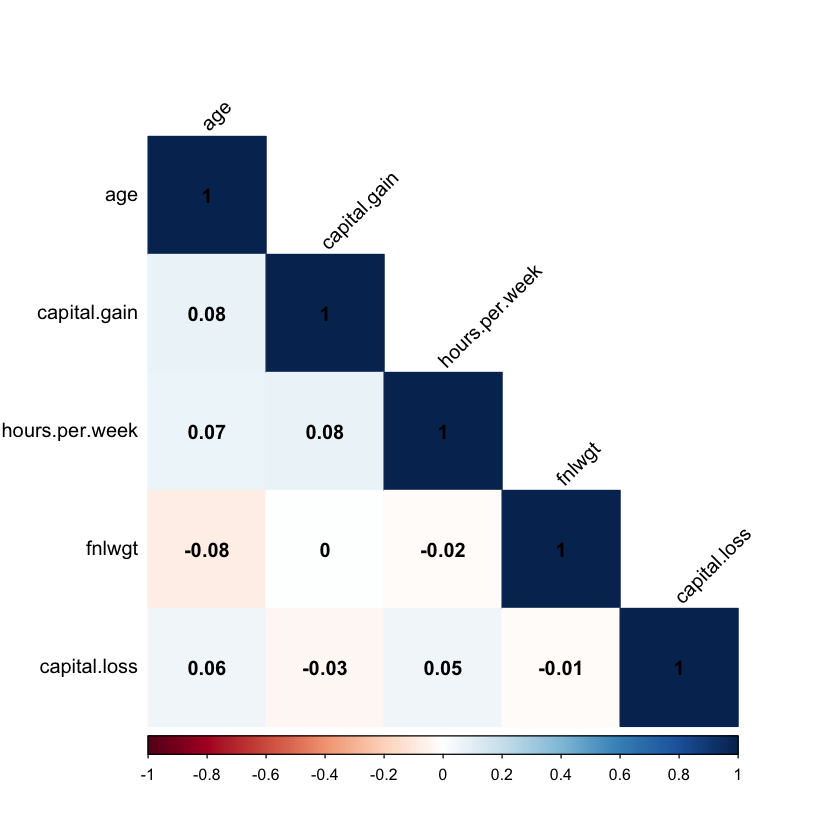

In [13]:
#numeric value correlation
numeric_val <- data[, unlist(lapply(data, is.numeric))]
corrplot(cor(numeric_val), method="color", 
         type="lower", order="hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45) #Text label color and rotation

Warning message in chisq.test(chi_square_test_q1):
“Chi-squared approximation may be incorrect”


              
               <=50K >50K
  10th            25    3
  11th            25    1
  12th            15    1
  1st-4th          6    0
  5th-6th         10    5
  7th-8th         22    1
  9th             12    0
  Assoc-acdm      20    8
  Assoc-voc       28   12
  Bachelors      107   76
  Doctorate        0   11
  HS-grad        273   39
  Masters         21   18
  Preschool        3    0
  Prof-school      4   13
  Some-college   193   48

              
               <=50K  >50K
  10th         0.025 0.003
  11th         0.025 0.001
  12th         0.015 0.001
  1st-4th      0.006 0.000
  5th-6th      0.010 0.005
  7th-8th      0.022 0.001
  9th          0.012 0.000
  Assoc-acdm   0.020 0.008
  Assoc-voc    0.028 0.012
  Bachelors    0.107 0.076
  Doctorate    0.000 0.011
  HS-grad      0.273 0.039
  Masters      0.021 0.018
  Preschool    0.003 0.000
  Prof-school  0.004 0.013
  Some-college 0.193 0.048

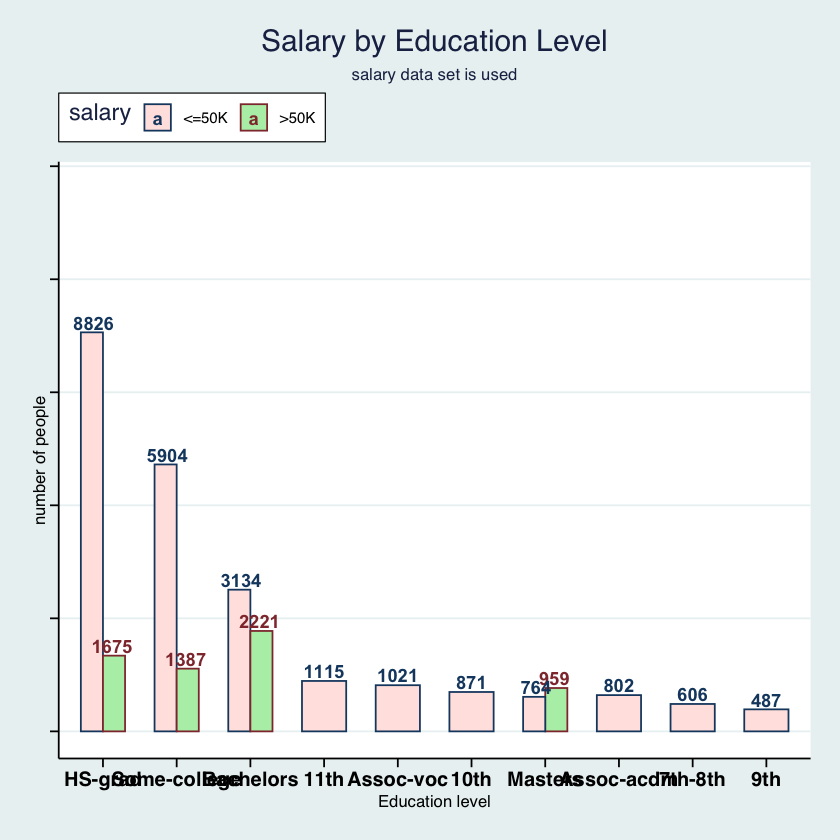

In [14]:
# 1-How does level of education relate to salary?
complete_data <- read.csv("imputed_complete_data.csv")
# Create a boxplot of salary by education level
library(ggthemes)
ed <- data %>%
  group_by(education,salary) %>%
  count(education) 
ed_2 <- head(ed[order(ed$n,decreasing = TRUE),],14)

ggplot(ed_2,aes(x=reorder(education,-n),y=n,fill=salary,col = salary))+geom_bar(stat="identity",width=0.6, position = "dodge")+ylim(0,12000)+
  labs(title="Salary by Education Level",y="number of people",x="Education level",
       subtitle ="salary data set is used")+
  scale_fill_manual(values=c("mistyrose1","darkseagreen2"))+
  geom_text(aes(label=n),vjust=-0.25,fontface="bold",position = position_dodge(width = 0.5))+
  theme_stata() + scale_color_stata() +
  theme(plot.title = element_text(size=18),plot.subtitle = element_text(size=10),
        axis.text = element_text(size=12,face="bold"),legend.text = element_text(size=9),
        axis.text.y = element_blank(),legend.position='top', 
        legend.justification='left',
        legend.direction='horizontal')

chi_square_test_q1 <- table(complete_data$education,complete_data$salary)
t <- chisq.test(chi_square_test_q1)
t$observed

#shows proportions
prop.table(table(complete_data$education,complete_data$salary))

workclass,salary,n
<fct>,<fct>,<int>
Government,<=50K,3010
Government,>50K,1341
Never-worked,<=50K,7
Private,<=50K,17733
Private,>50K,4963
Self_employment,<=50K,2311
Self_employment,>50K,1346
Without-pay,<=50K,14
NA,<=50K,1645


Warning message in chisq.test(salary_by_sector):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  salary_by_sector
X-squared = 16.583, df = 3, p-value = 0.0008608


                 
                      <=50K      >50K
  Government      0.7299270 0.2700730
  Private         0.7900404 0.2099596
  Self_employment 0.6293103 0.3706897
  Without-pay     1.0000000 0.0000000

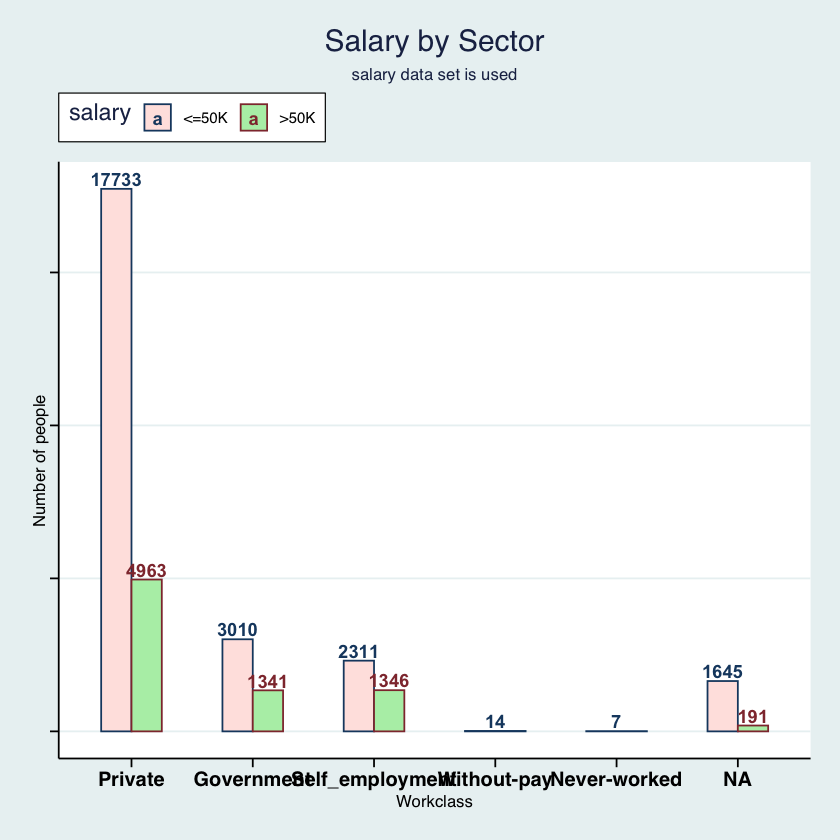

In [15]:
#2. Is there a difference in salary between individuals who work in the private sector versus those who work in the government or are self-employed?
q2<-data %>%
  group_by(workclass, salary) %>%
  count(salary) 
q2

ggplot(q2,aes(x=reorder(workclass,-n),y=n,fill=salary, col = salary))+geom_bar(stat="identity",width=0.5,position = "dodge") +
  labs(title="Salary by Sector",y="Number of people",x="Workclass",subtitle ="salary data set is used")+
  scale_fill_manual(values=c("mistyrose1","darkseagreen2"))+
  geom_text(aes(label=n),vjust=-0.25,fontface="bold",position = position_dodge(width = 0.5)) +
  theme_stata() + scale_color_stata() +
  theme(plot.title = element_text(size=18),plot.subtitle = element_text(size=10),
        axis.text = element_text(size=12,face="bold"),legend.text = element_text(size=9),
        axis.text.y = element_blank(),legend.position='top', 
        legend.justification='left',
        legend.direction='horizontal')

# Let's look at the proportions
salary_by_sector <- table(complete_data$workclass, complete_data$salary)


# Perform a chi-square test of independence
chi_square_result <- chisq.test(salary_by_sector)
chi_square_result

# Calculate the proportions of salary levels within each sector
prop_by_sector <- prop.table(salary_by_sector, margin = 1)
prop_by_sector


Attaching package: ‘rcompanion’


The following object is masked from ‘package:psych’:

    phi




variable,statistic,p.value
<chr>,<dbl>,<dbl>
complete_data$hours.per.week,0.873316,1.012747e-27



	Welch Two Sample t-test

data:  complete_data$hours.per.week by complete_data$salary
t = -7.5252, df = 387.87, p-value = 3.711e-13
alternative hypothesis: true difference in means between group <=50K and group >50K is not equal to 0
95 percent confidence interval:
 -8.393241 -4.915970
sample estimates:
mean in group <=50K  mean in group >50K 
           38.72251            45.37712 


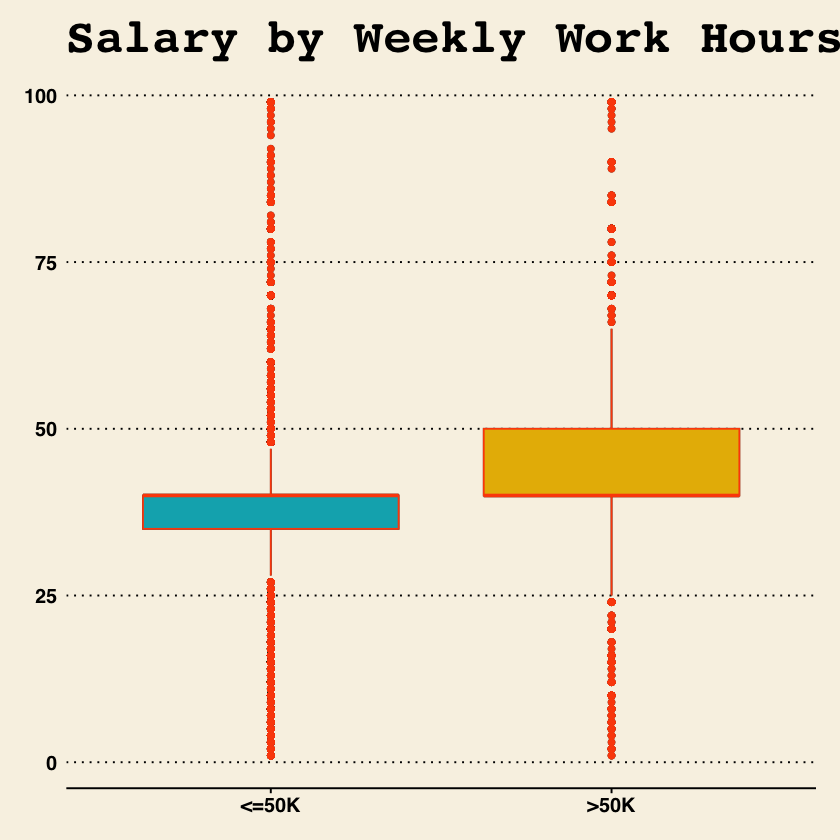

In [16]:
#3-How work hours per week distributed over salary? 
library(ggthemes)
library(rcompanion)
data$salary <- as.factor(data$salary)
# Create a scatterplot of salary by weekly work hours
q3 <- ggplot(data, aes(x = salary, y = hours.per.week)) +
  geom_boxplot() +
  xlab("Weekly Work Hours") +
  ylab("Salary") +
  ggtitle("Salary by Weekly Work Hours")

q3 + geom_boxplot(fill = c("#00AFBB", "#E7B800"), color = ("#FC4E07")) + 
  theme_wsj()

# Perform a t-test to compare the mean weekly work hours between salary categories
shapiro_test(complete_data$hours.per.week)

t_test_result <- t.test(complete_data$hours.per.week ~ complete_data$salary,data)
t_test_result

        
         <=50K >50K
  Female   298   32
  Male     466  204


	Pearson's Chi-squared test with Yates' continuity correction

data:  salary_by_gender
X-squared = 51.658, df = 1, p-value = 6.607e-13


Warning message in chisq.test(salary_by_race):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  salary_by_race
X-squared = 9.7719, df = 4, p-value = 0.04445


                
                     <=50K      >50K
  AsianIslander  0.6923077 0.3076923
  Black          0.8865979 0.1134021
  NativeAmerican 0.7272727 0.2727273
  Other          0.7500000 0.2500000
  White          0.7538462 0.2461538

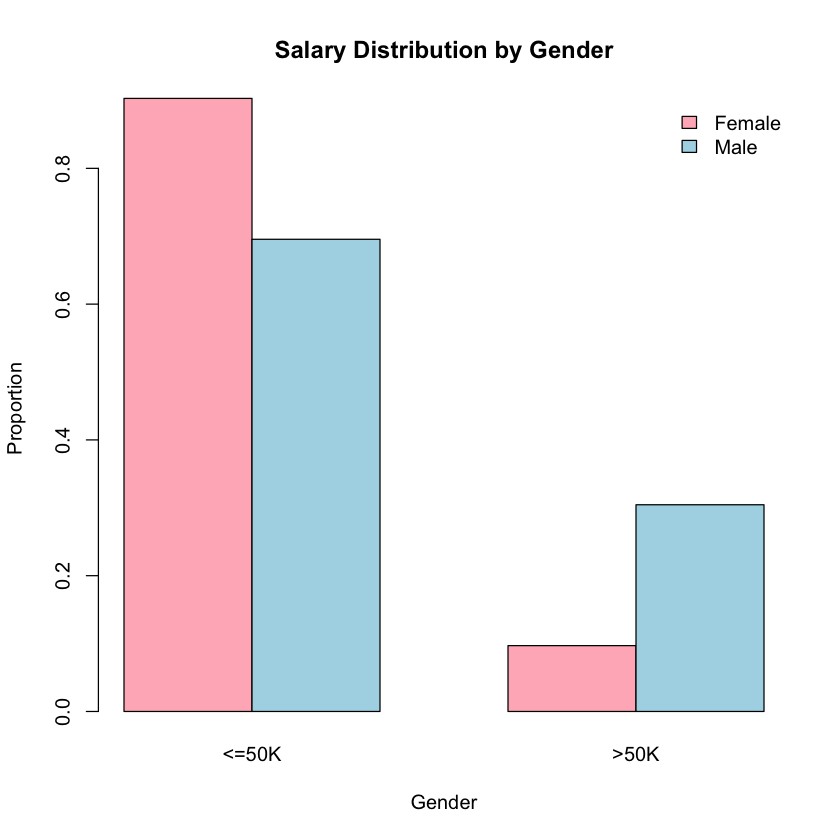

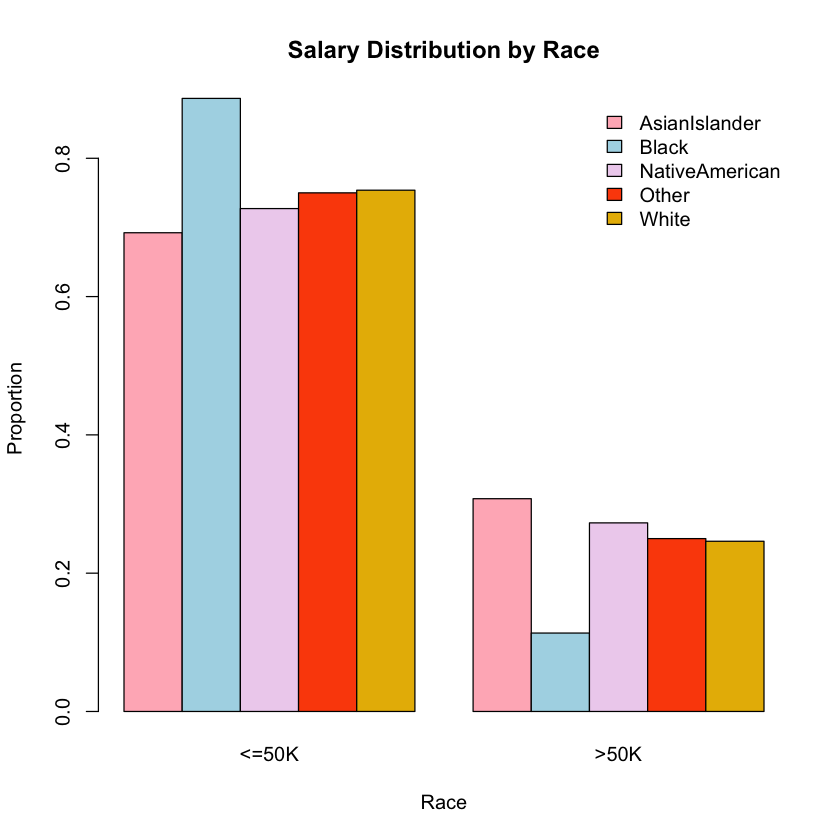

In [17]:
#4 Is there a difference in salary between individuals of different races or genders?
salary_by_gender <- table(complete_data$sex, complete_data$salary)
salary_by_gender

# Perform a chi-square test of independence
chisq.test(salary_by_gender)

# Calculate the proportions of salary levels within each gender
table_q4 <- prop.table(salary_by_gender, margin = 1)

# Create a stacked barplot of salary distribution by gender

barplot(table_q4, beside = TRUE, legend = TRUE, xlab = "Gender",args.legend = list(x= "topright",bty="n")  ,ylab = "Proportion", main = "Salary Distribution by Gender",col = c("lightpink","lightblue"))

#Create table
salary_by_race <- table(complete_data$race, complete_data$salary)

chisq.test(salary_by_race)
proportions_by_race <-prop.table(salary_by_race, margin = 1)
proportions_by_race
barplot(proportions_by_race, beside = TRUE, legend = TRUE,args.legend = list(x= "topright",bty="n") ,xlab = "Race", ylab = "Proportion", main = "Salary Distribution by Race",col = c("lightpink","lightblue","thistle2","#FC4E07","#E7B800"))

             Df Sum Sq Mean Sq F value   Pr(>F)    
workclass     3   6286  2095.3   11.44 2.24e-07 ***
Residuals   996 182462   183.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = age ~ workclass, data = complete_data)

$workclass
                                  diff        lwr       upr     p adj
Private-Government           -5.027782  -8.266300 -1.789265 0.0004032
Self_employment-Government    1.144098  -3.250616  5.538812 0.9084271
Without-pay-Government      -13.450730 -31.118385  4.216925 0.2043404
Self_employment-Private       6.171880   2.694655  9.649105 0.0000329
Without-pay-Private          -8.422948 -25.885010  9.039115 0.6006690
Without-pay-Self_employment -14.594828 -32.307793  3.118138 0.1472952



	Shapiro-Wilk normality test

data:  residuals(anova)
W = 0.96736, p-value = 3.43e-14


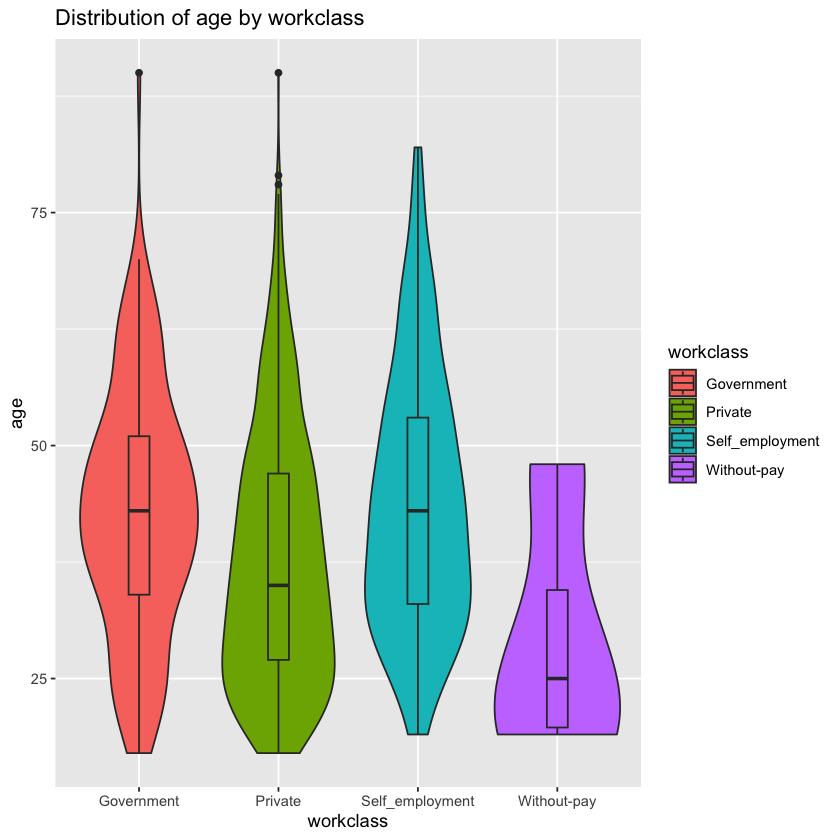

workclass,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Government,age,0.9833426,9.370651e-02
Private,age,0.9567711,5.668804e-14
Self_employment,age,0.9666955,5.534051e-03
Without-pay,age,0.8591471,2.571795e-01


workclass,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary,is.outlier,is.extreme
<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<lgl>
Government,90,214594,7th-8th,4,Married,ProtectiveServ,Husband,White,Male,2653,0,40,USA,<=50K,TRUE,FALSE
Private,90,39824,HS-grad,9,Single,Repairing,Not-in-family,White,Male,401,0,4,USA,<=50K,TRUE,FALSE
Private,79,333230,HS-grad,9,Married,Professionals,Not-in-family,White,Male,0,0,6,USA,<=50K,TRUE,FALSE
Private,78,180239,Masters,14,Single,Repairing,Unmarried,AsianIslander,Male,0,0,40,SouthKorea,<=50K,TRUE,FALSE


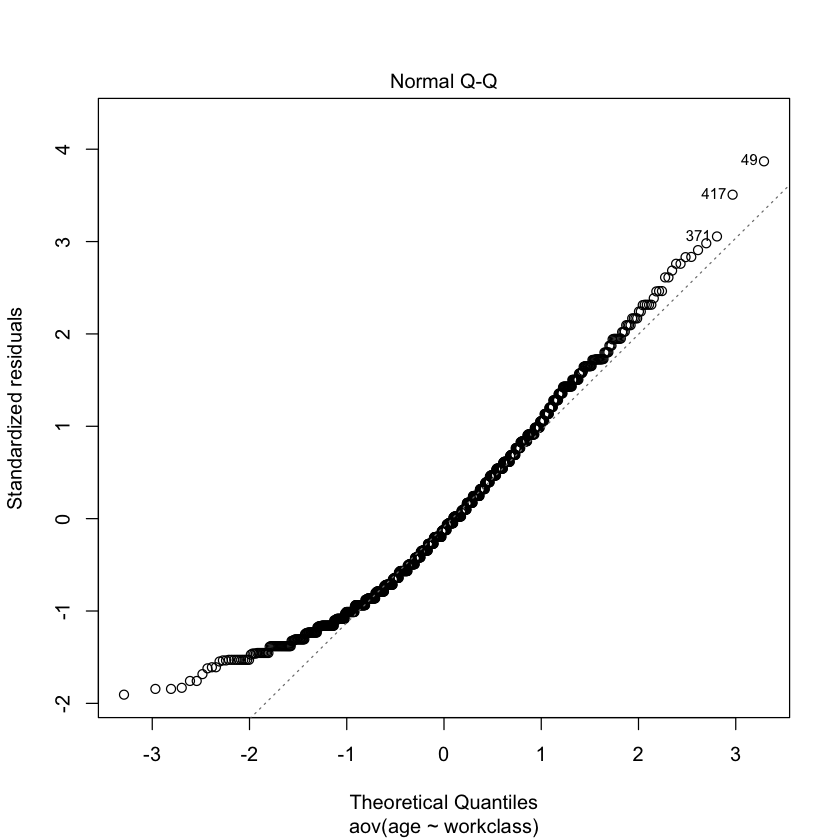


  Box-Cox power transformation 
------------------------------------------------------------------------
   data : complete_data$age 


   lambda.hat : 0.21 


  Shapiro-Wilk normality test for transformed data (alpha = 0.05)
-------------------------------------------------------------------
   statistic  : 0.986819 

   p.value    : 7.829539e-08 

   Result     : Transformed data are not normal. 
------------------------------------------------------------------------


	Kruskal-Wallis rank sum test

data:  age by workclass
Kruskal-Wallis chi-squared = 35.966, df = 3, p-value = 7.615e-08



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  complete_data$age and complete_data$workclass 

                Government Private Self_employment
Private         9.0e-05    -       -              
Self_employment 0.76       3.9e-05 -              
Without-pay     0.20       0.36    0.20           

P value adjustment method: holm 

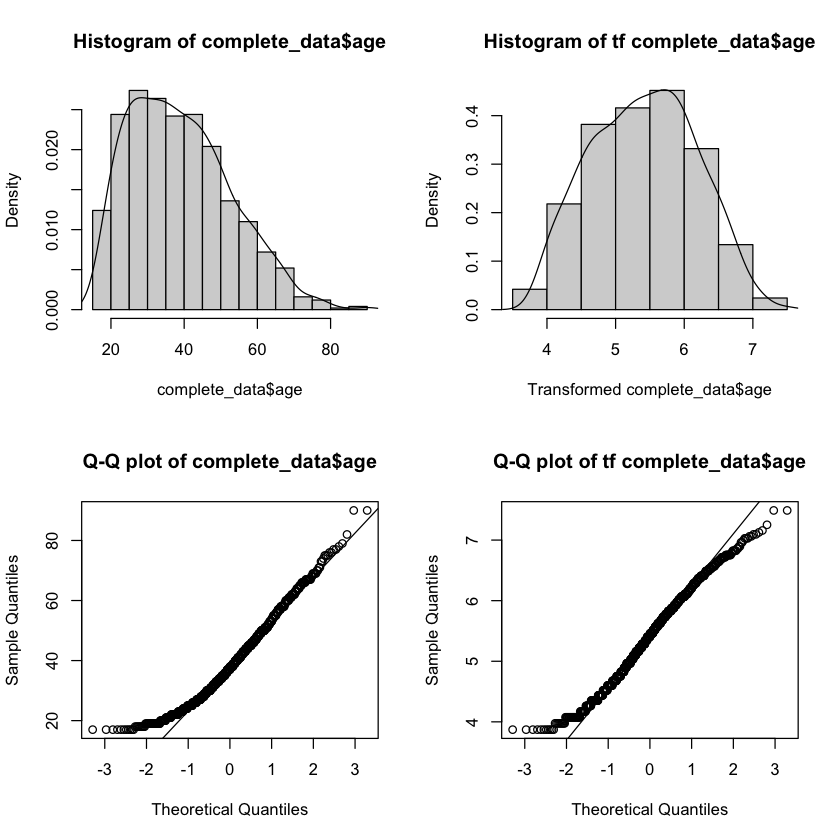

In [18]:
#5-How worker's age distribute over workclass type?
# Method : One-Way ANOVA

# We can apply ANOVA to see whether there is a significant difference in salary between the workclass statuses.

ggplot(complete_data,aes(x=workclass,y=age,fill=workclass))+geom_violin()+geom_boxplot(width=0.15)+labs(title="Distribution of age by workclass")

anova <- aov(age ~ workclass, data = complete_data)
summary(anova)

# When we look at the output, we can see that some of the workclass status are significantly different.
# In order to see, which of them are different, we can conduct TUKEY.

TukeyHSD(anova)

# There is a significant difference between private and government workers.
# Also, there is a significant difference between under self_employment-private customers.

#  Assumptions of ANOVA

# 1)Errors are normally distributed

# 2)Errors have constant variance

# 3)Errors are independent from one another.

# NORMALITY OF THE RESIDUALS

shapiro.test(residuals(anova))

# The shapiro wilk test shows that the residuals are not normally distributed.

plot(anova,2)

# The QQ plot shows that the quantiles do not lie on the straight line mostly, this indicates that residuals are not normally distributed.

# Normality assumptions by groups

complete_data %>%
  group_by(workclass) %>%
  shapiro_test(age)

# In each of the groups, the normality assumption is not satisfied.

# Outliers

complete_data %>% 
  group_by(workclass) %>%
  identify_outliers(age)

# There are outliers.

boxcoxnc(complete_data$age)

# We can not satisfy the normality assumption with transformation.

# Since normality assumption is violated,  Kruskal-Wallis is applied which is a non-parametric version of One-Way ANOVA.

kruskal.test(age ~ workclass, data = complete_data)

# P-value = 7.615e-08 is less than 0.05, so we can conclude that there is a significant difference between work-class statuses. Pairwise test should be applied.

# Pairwise test

pairwise.wilcox.test(complete_data$age, complete_data$workclass)

# The p-values less than 0.05 indicate that the corresponding pairs of methods are significantly different.

# There is a significant difference in age between private and government workers and self-emplyoment private workers.


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


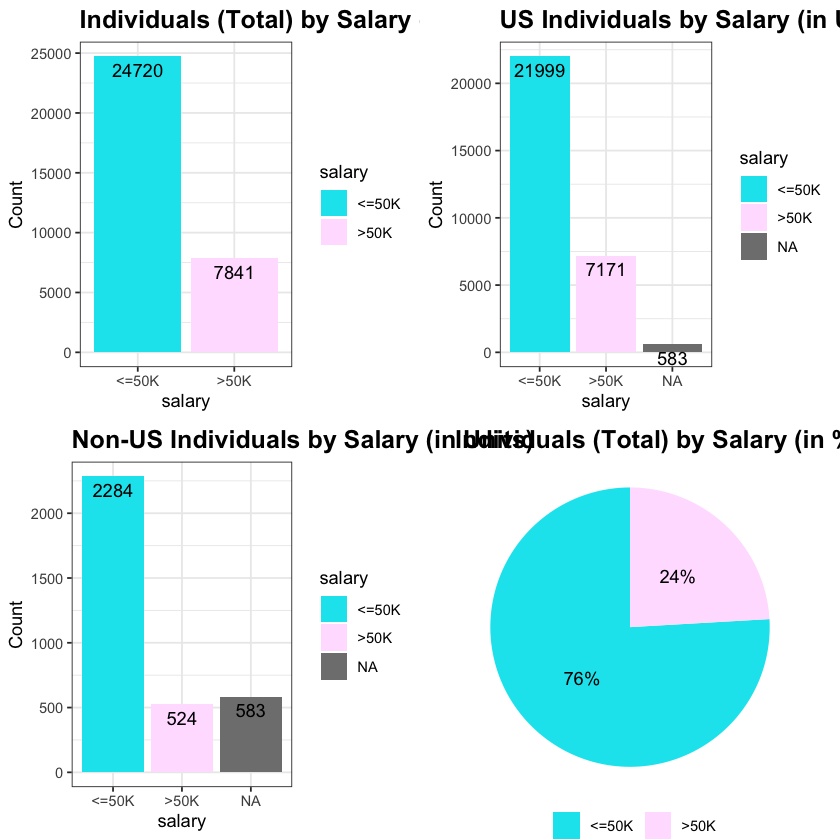

In [19]:
#6.What is the association between US,Non-US citizens and their salaries? 
library(VIM)
library(mice)
#MODEL SONrasoı train test e bak overfitting yoksa pca gerek yok
USA <- data[data$native.country == 'USA', ]
NonUSA <- data[data$native.country != 'USA', ]

# Defining color palette and explode values for pie charts
my_pal <- c("turquoise2", "thistle1", "#F08080")
my_xpl <- c(0.05, 0.08)

grid.arrange(
  
  # Individuals (Total) by Salary (in Units)
  ggplot(data, aes(x = salary, fill = salary)) + 
    geom_bar() + 
    scale_fill_manual(values = my_pal) + 
    ggtitle("Individuals (Total) by Salary (in Units)") + 
    labs(y = "Count") + 
    theme_bw() + 
    theme(plot.title = element_text(size = 15, face = "bold")) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.5),
  
  # US Individuals by Salary (in Units)
  ggplot(USA, aes(x = salary, fill = salary)) + 
    geom_bar() + 
    scale_fill_manual(values = my_pal) + 
    ggtitle("US Individuals by Salary (in Units)") + 
    labs(y = "Count") + 
    theme_bw() + 
    theme(plot.title = element_text(size = 15, face = "bold")) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.5),
  
  # Non-US Individuals by Salary (in Units)
  ggplot(NonUSA, aes(x = salary, fill = salary)) + 
    geom_bar() + 
    scale_fill_manual(values = my_pal) + 
    ggtitle("Non-US Individuals by Salary (in Units)") + 
    labs(y = "Count") + 
    theme_bw() + 
    theme(plot.title = element_text(size = 15, face = "bold")) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.5),
  
  # Individuals (Total) by Salary (in %)
  ggplot(data, aes(x = "", fill = salary)) + 
    geom_bar(width = 1) + 
    scale_fill_manual(values = my_pal) + 
    ggtitle("Individuals (Total) by Salary (in %)") + 
    labs(fill = "Salary", x = NULL, y = NULL) + 
    coord_polar(theta = "y") + 
    theme_void() + 
    theme(plot.title = element_text(size = 15, face = "bold")) + 
    geom_text(stat = "count", aes(label = paste0(round(..count../sum(..count..)*100), "%")), position = position_stack(vjust = 0.5)) + 
    guides(fill = guide_legend(title = NULL)) + 
    theme(legend.position = "bottom"))

Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”



 Variables sorted by number of missings: 
       Variable      Count
     occupation 0.05660146
      workclass 0.05638647
 native.country 0.01790486
            age 0.00000000
         fnlwgt 0.00000000
      education 0.00000000
  education.num 0.00000000
 marital.status 0.00000000
   relationship 0.00000000
           race 0.00000000
            sex 0.00000000
   capital.gain 0.00000000
   capital.loss 0.00000000
 hours.per.week 0.00000000
         salary 0.00000000


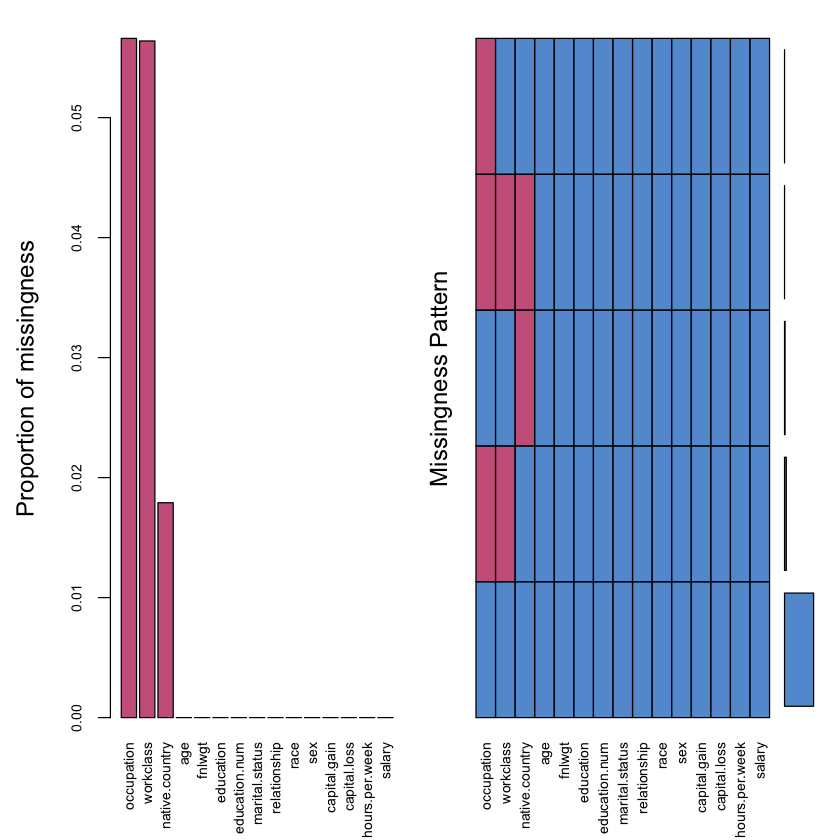

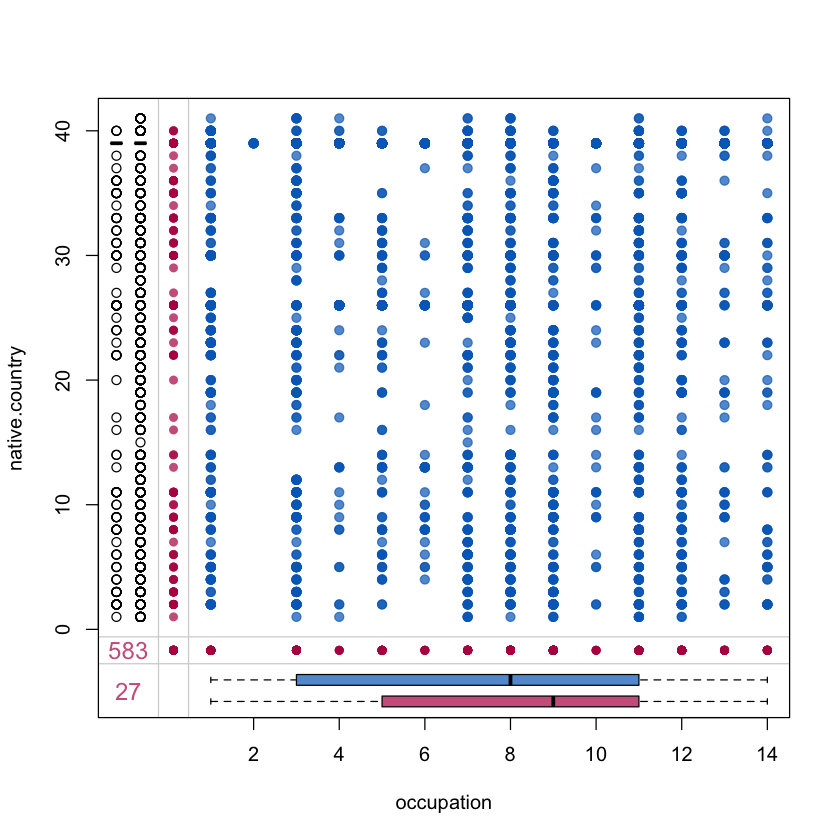

In [20]:
# Observing NA
data_miss = aggr(data, col=mdc(1:2), numbers=TRUE, sortVars=TRUE, labels=names(data), 
                 cex.axis=.7, gap=3, ylab=c("Proportion of missingness","Missingness Pattern"))
marginplot(data[, c("occupation", "native.country")], col = mdc(1:2), cex.numbers = 1.2, pch = 19)

[1] 0

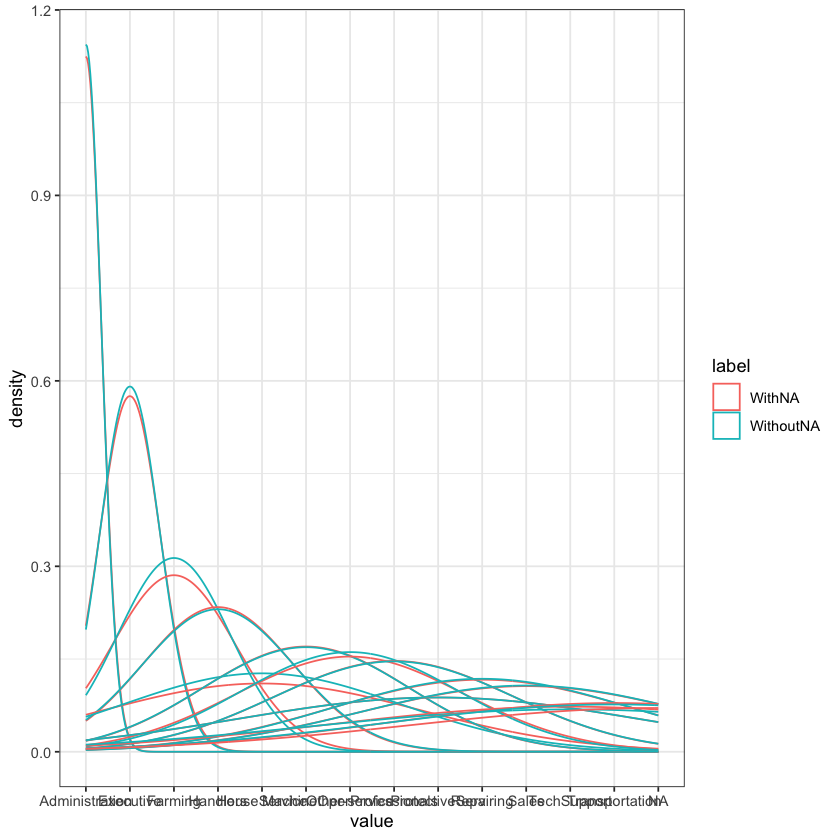

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

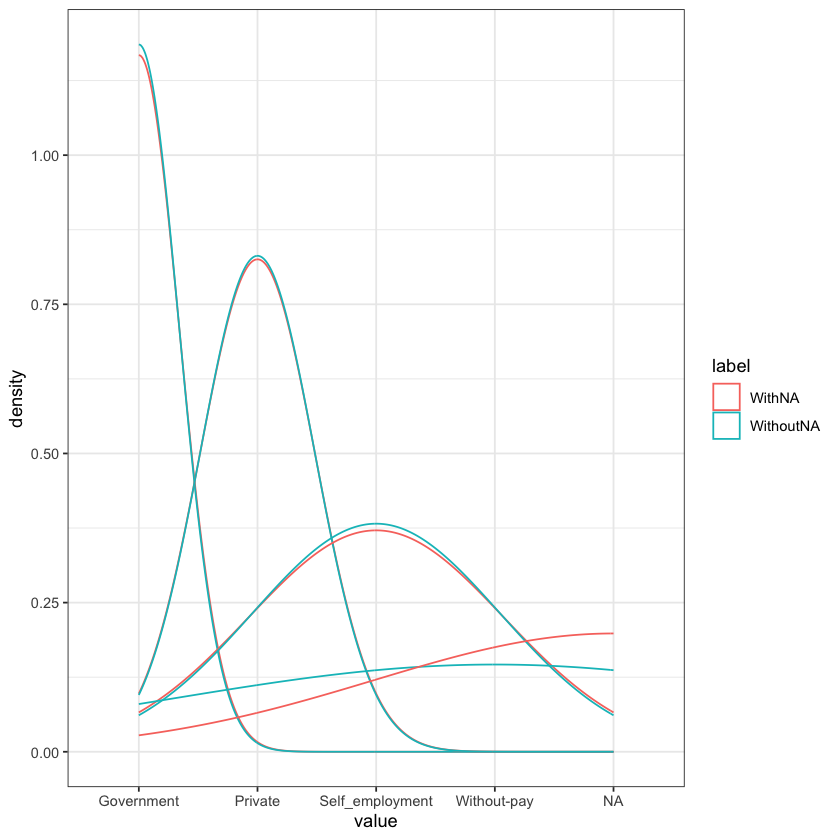

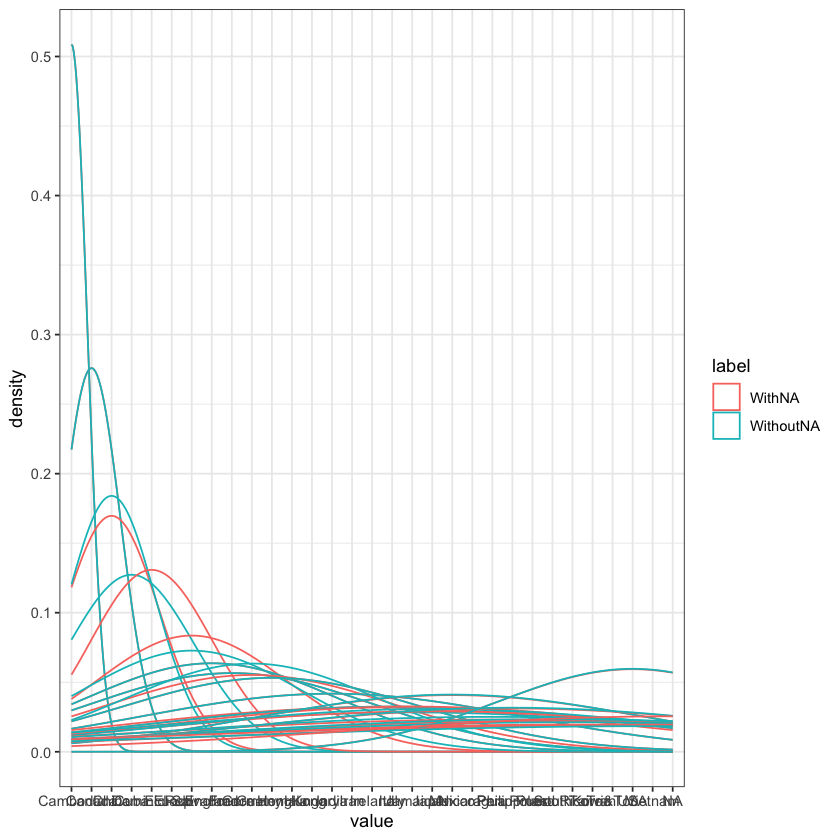

In [21]:
# SAMPLE AND IMPUTATION
library(readr)
set.seed(123)
sample_data <- sample_n(data, 1000)

#data_imputes <- mice(sample_data, m=5, seed = 500, maxit = 40)
#computer run too slowly, thus I saved complete data in computer after
#imputation process
#data_imputes$imp$salary

#complete_data <-mice::complete(data_imputes,5)
complete_data <- read.csv("imputed_complete_data.csv")


#write_csv(complete_data, "imputed_complete_data.csv")

sum(is.na(complete_data))

# There are no missing observations.

#xyplot(data_imputes, salary ~ hours.per.week | .imp, pch=20, cex= 1.4)

complete_data$workclass <- as.factor(complete_data$workclass)
complete_data$education <- as.factor(complete_data$education)
complete_data$education.num <- as.factor(complete_data$education.num)
complete_data$marital.status <- as.factor(complete_data$marital.status)
complete_data$occupation <- as.factor(complete_data$occupation)
complete_data$relationship <- as.factor(complete_data$relationship)
complete_data$race <- as.factor(complete_data$race)
complete_data$sex <- as.factor(complete_data$sex)
complete_data$native.country <- as.factor(complete_data$native.country)
complete_data$salary <- as.factor(complete_data$salary)

# After filling, NA comparison

#occupation
occupation_withNA<- sample_data$occupation
occupation_withoutNA<- complete_data$occupation
value<-c(occupation_withNA,occupation_withoutNA)
label <-c(rep("WithNA",length(occupation_withNA)),rep("WithoutNA",length(occupation_withoutNA)))
df_for_plot<-data.frame(value,label)
ggplot(df_for_plot,aes(x=value,colour= label))+geom_density()+ theme_bw()

#workclass
workclass_withNA<- sample_data$workclass
workclass_withoutNA<- complete_data$workclass
value<-c(workclass_withNA,workclass_withoutNA)
label <-c(rep("WithNA",length(workclass_withNA)),rep("WithoutNA",length(workclass_withoutNA)))
df_for_plot<-data.frame(value,label)
ggplot(df_for_plot,aes(x=value,colour= label))+geom_density()+ theme_bw()

##native country
native.country_withNA<- sample_data$native.country
native.country_withoutNA<- complete_data$native.country
value<-c(native.country_withNA,native.country_withoutNA)
label <-c(rep("WithNA",length(native.country_withNA)),rep("WithoutNA",length(native.country_withoutNA)))
df_for_plot<-data.frame(value,label)

ggplot(df_for_plot,aes(x=value,colour= label))+geom_density()+ theme_bw()

$call
dummyVars.default(formula = " ~ .", data = encoding_data)

$form
~.
<environment: 0x7fe9d12acf40>

$vars
[1] "workclass"      "fnlwgt"         "education"      "occupation"    
[5] "relationship"   "race"           "native.country"

$facVars
[1] "workclass"      "education"      "occupation"     "relationship"  
[5] "race"           "native.country"

$lvls
$lvls$workclass
[1] "Government"      "Private"         "Self_employment" "Without-pay"    

$lvls$education
 [1] "10th"         "11th"         "12th"         "1st-4th"      "5th-6th"     
 [6] "7th-8th"      "9th"          "Assoc-acdm"   "Assoc-voc"    "Bachelors"   
[11] "Doctorate"    "HS-grad"      "Masters"      "Preschool"    "Prof-school" 
[16] "Some-college"

$lvls$occupation
 [1] "Administration" "Executive"      "Farming"        "Handlers"      
 [5] "HouseService"   "MachineOper"    "Other-service"  "Professionals" 
 [9] "ProtectiveServ" "Repairing"      "Sales"          "TechSupport"   
[13] "Transportation"

$lvls$

'data.frame':	1000 obs. of  73 variables:
 $ workclass.Government       : num  1 1 0 0 0 0 0 0 0 0 ...
 $ workclass.Private          : num  0 0 1 1 1 1 1 1 1 1 ...
 $ workclass.Self_employment  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workclass.Without.pay      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fnlwgt                     : num  190709 367251 186950 82161 203182 ...
 $ education.10th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.11th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.12th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.1st.4th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.5th.6th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.7th.8th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.9th              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.Assoc.acdm       : num  1 0 0 0 0 1 0 0 0 0 ...
 $ education.Assoc.voc        : num  0 0 1 0 0 0 0 0 0 0 ...
 $ education.Bachelors        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ education.Doctorate       

[1] 1000   73

'data.frame':	1000 obs. of  81 variables:
 $ workclass.Government       : num  1 1 0 0 0 0 0 0 0 0 ...
 $ workclass.Private          : num  0 0 1 1 1 1 1 1 1 1 ...
 $ workclass.Self_employment  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workclass.Without.pay      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fnlwgt                     : num  190709 367251 186950 82161 203182 ...
 $ education.10th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.11th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.12th             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.1st.4th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.5th.6th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.7th.8th          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.9th              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.Assoc.acdm       : num  1 0 0 0 0 1 0 0 0 0 ...
 $ education.Assoc.voc        : num  0 0 1 0 0 0 0 0 0 0 ...
 $ education.Bachelors        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ education.Doctorate       

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

After 13 iterations, +6.5 secs: 

 confirmed 13 attributes: age, capital.gain, capital.loss, education.Bachelors, education.Doctorate and 8 more;

 rejected 48 attributes: education.10th, education.12th, education.1st.4th, education.5th.6th, education.Assoc.acdm and 43 more;

 still have 18 attributes left.


 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

 18. run of importance source...

After 18 iterations, +8.1 secs: 

 confirmed 3 attributes: occupation.Transportation, 

Boruta performed 99 iterations in 32.97357 secs.
 20 attributes confirmed important: age, capital.gain, capital.loss,
education.7th.8th, education.Bachelors and 15 more;
 56 attributes confirmed unimportant: education.10th, education.11th,
education.12th, education.1st.4th, education.5th.6th and 51 more;
 3 tentative attributes left: education.9th, education.Masters,
occupation.Sales;
Boruta performed 99 iterations in 32.97357 secs.
Tentatives roughfixed over the last 99 iterations.
 21 attributes confirmed important: age, capital.gain, capital.loss,
education.7th.8th, education.Bachelors and 16 more;
 58 attributes confirmed unimportant: education.10th, education.11th,
education.12th, education.1st.4th, education.5th.6th and 53 more;


[1] "education.7th.8th"          "education.Bachelors"       
 [3] "education.Doctorate"        "education.HS.grad"         
 [5] "education.Prof.school"      "occupation.Executive"      
 [7] "occupation.Farming"         "occupation.Other.service"  
 [9] "occupation.Professionals"   "occupation.Transportation" 
[11] "relationship.Husband"       "relationship.Not.in.family"
[13] "relationship.Own.child"     "relationship.Unmarried"    
[15] "age"                        "hours.per.week"            
[17] "capital.gain"               "capital.loss"              
[19] "marital.status"             "sex"

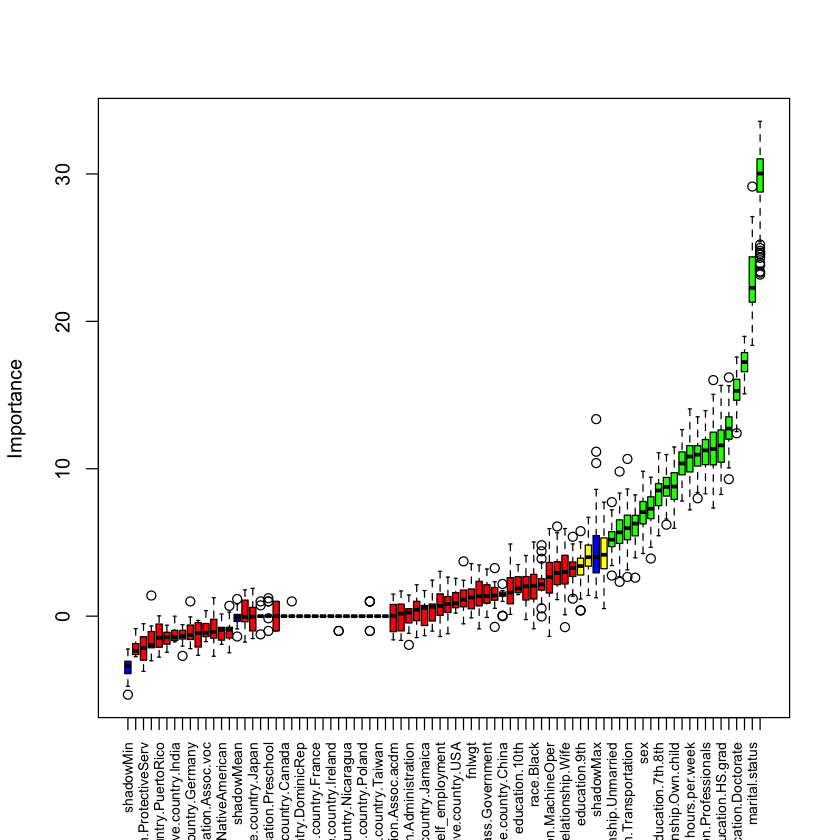

In [23]:
# One Hot Encoding and BORUTA feature engineering
#education.num info already comes from the education column, capital loss and capital gain have a 
#lot of 0 values that give us wrong result. Moreover relationship can be evaluated by using married status.
#Including these variables can be increase the multicollinearity, Thus we don't need to put these variables into the model.

#To prove this one hot encoding and boruta was applied.Then, it is obvious that the above assumption is appropriate.

#select the categorical variables more than 2 level and create new dataset
complete_data$salary <- ifelse(complete_data$salary == "<=50K", 0, 1)

encoding_data <- subset(complete_data, select = -c(age,hours.per.week,marital.status,sex,capital.gain,capital.loss,education.num,salary))
without_encoding_data <- subset(complete_data, select = c(age,fnlwgt,hours.per.week,capital.gain,capital.loss,marital.status,sex,salary))

dummy <- dummyVars(" ~ .", data=encoding_data)
head(dummy)

final_df <- data.frame(predict(dummy, newdata=encoding_data))
str(final_df)
dim(final_df)

final_data_set <- cbind(final_df,without_encoding_data)
#final_data_set$salary <- as.factor(final_data_set$salary)
str(final_data_set)


####BORUTA FEATURE SELECTION
boruta_data <- Boruta(salary ~ ., data = final_data_set, doTrace = 2)
print(boruta_data)
boruta.finaldata <- TentativeRoughFix(boruta_data)
print(boruta.finaldata)

SelectedCols <- getSelectedAttributes(boruta.finaldata, withTentative = F)
complete_data_new <- subset(final_data_set, select = SelectedCols)

plot(boruta_data, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta_data$ImpHistory),function(i)
  boruta_data$ImpHistory[is.finite(boruta_data$ImpHistory[,i]),i])
names(lz) <- colnames(boruta_data$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
     at = 1:ncol(boruta_data$ImpHistory), cex.axis = 0.7)

getSelectedAttributes(boruta_data, withTentative = F)

response <- complete_data$salary
complete_data_new$salary <- response

#It is obvious that education,occupation,marital status,gender,age, and hours per week is crucial variables for the model.
#complete_data_new$native.country <- NULL
#complete_data_new$education.num <- NULL
#complete_data_new$fnlwgt <- NULL

In [24]:
#Cross-Validation and Models
####MODELS################
# The Validation set Approach
str(complete_data_new)
complete_data_new$salary<- as.factor(complete_data_new$salary)
# Splitting the data into training and test set
library(splitTools)
set.seed(80)
training.samples <- complete_data$salary %>% createDataPartition(p = 0.8, list = FALSE) 
#creating DataPartition to help to define train set index 
train.data  <- complete_data_new[training.samples, ]
test.data <-  complete_data_new[-training.samples, ]
table(complete_data$salary)

#BECAUSE OF THE I WAS TAKING SAMPLE, 0 INCLUDES IN CAPITALL.GAIN OVERLAP WITH THE SAMPLE, THUS MODEL GET THE ERROR 
#Warning: glm.fit: fitted probabilities numerically 0 or 1 occurred, TO FIX THIS I ADDED THE VARIABLES MANUALLY
# Full Model With The Validation set Approach,() capital gain overlap with sample, native country

modelvalid <- glm(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service + occupation.Professionals + occupation.Transportation + relationship.Husband + relationship.Not.in.family +relationship.Own.child+relationship.Unmarried + age + hours.per.week + capital.loss + marital.status + sex , data = train.data, family = binomial())

#Prediction
predictions <- modelvalid %>% predict(test.data)

predicted_labels <- ifelse(predictions > 0.5, 1, 0)  # Convert probabilities to binary labels
accuracy_1 <- mean(predicted_labels == test.data$salary)
accuracy_1 

'data.frame':	1000 obs. of  22 variables:
 $ education.7th.8th         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ education.Bachelors       : num  0 0 0 1 0 0 0 0 0 0 ...
 $ education.Doctorate       : num  0 0 0 0 0 0 1 0 0 0 ...
 $ education.HS.grad         : num  0 0 0 0 0 0 0 1 1 1 ...
 $ education.Prof.school     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ occupation.Executive      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ occupation.Farming        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ occupation.Other.service  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ occupation.Professionals  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ occupation.Sales          : num  0 0 0 0 1 0 0 0 1 1 ...
 $ occupation.Transportation : num  0 0 0 0 0 0 0 0 0 0 ...
 $ relationship.Husband      : num  0 1 0 0 0 1 0 1 0 1 ...
 $ relationship.Not.in.family: num  1 0 0 1 0 0 1 0 1 0 ...
 $ relationship.Own.child    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ relationship.Unmarried    : num  0 0 0 0 1 0 0 0 0 0 ...
 $ age                       : int  23 46 26 40 22 41 32 4


  0   1 
764 236 

[1] 0.855

In [25]:
##SELECTION OF BEST METHOD TO IMBALANCED DATA
#unbalanced Method
# Define training control
set.seed(108)
train.control.original <- caret::trainControl(method = "repeatedcv", 
                                              number = 10, repeats = 5)


model_original <- caret::train(salary ~., data = train.data, method = "glm",
                               trControl = train.control.original)
summary(model_original)


final <- data.frame(actual = test.data$salary,
                    predict(model_original, newdata = test.data, type = "prob"))
final$predict <- ifelse(as.numeric(final$X1) > 0.5, "1", "0")
final$predict <- as.character(final$predict)
test.data$salary <- as.character(test.data$salary)

#DOWN Method
# Define training control
set.seed(108)
train.control.down <- caret::trainControl(method = "repeatedcv", 
                                          number = 10, repeats = 5, sampling="down")




model_down <- caret::train(salary ~., data = train.data, method = "glm",
                           trControl = train.control.down)
summary(model_down)
final_down <- data.frame(actual = test.data$salary, predict(model_down, newdata = test.data, type = "prob"))

final_down$predict <- ifelse(final_down$X1 > 0.5, "1", "0")


#UP Method
# Define training control
set.seed(108)
train.control.up <- caret::trainControl(method = "repeatedcv", 
                                        number = 10, repeats = 5, sampling="up")




model_up <- caret::train(salary ~., data = train.data, method = "glm",
                         trControl = train.control.up)
summary(model_up)
set.seed(108)
final_up <- data.frame(actual = test.data$salary, predict(model_up, newdata = test.data, type = "prob"))
final_up$predict <- ifelse(final_up$X1 > 0.5, "1", "0")


#SMOTE Method
# Define training control
set.seed(108)
train.control.smote <- caret::trainControl(method = "repeatedcv", 
                                           number = 10, repeats = 5, sampling="smote")
model_smote <- caret::train(salary ~., data = train.data, method = "glm",
                            trControl = train.control.smote)
summary(model_smote)



final_smote <- data.frame(actual = test.data$salary, predict(model_smote, newdata = test.data, type = "prob"))

final_smote$predict <- ifelse(final_smote$X1 > 0.5, "1", "0")


#ROSE Method
# Define training control
set.seed(108)
train.control.rose <- caret::trainControl(method = "repeatedcv", 
                                          number = 10, repeats = 5, sampling="rose")
library(caret)
model_rose <- train(salary ~., data = train.data, method = "glm",
                    trControl = train.control.rose)
summary(model_rose)



final_rose <- data.frame(actual = test.data$salary, predict(model_rose, newdata = test.data, type = "prob"))

final_rose$predict <- ifelse(final_rose$X1 > 0.5, "1", "0")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8847  -0.5429  -0.2043  -0.0693   2.9587  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.906e+00  7.053e-01  -4.120 3.79e-05 ***
education.7th.8th          -1.914e+00  1.104e+00  -1.734 0.082917 .  
education.Bachelors         8.797e-01  3.042e-01   2.891 0.003835 ** 
education.Doctorate         1.842e+01  5.635e+02   0.033 0.973926    
education.HS.grad          -8.050e-01  2.786e-01  -2.889 0.003865 ** 
education.Prof.school       2.383e+00  9.219e-01   2.584 0.009758 ** 
occupation.Executive        9.213e-01  3.208e-01   2.872 0.004078 ** 
occupation.Farming         -1.197e+00  7.541e-01  -1.588 0.112351    
occupation.Other.service   -5.540e-01  5.583e-01  -0.992 0.321024    
occupation.Professionals   -5.559e-02  4.008e-01  -0.139 0.889696    
occupation.Sales            6.199e-01  3.506e-01   1.768 0.077098 .  
occupation.Transpor

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.27377  -0.48949  -0.04099   0.52020   2.62339  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                -1.191e+00  1.001e+00  -1.190  0.23390   
education.7th.8th          -1.853e+00  1.241e+00  -1.494  0.13529   
education.Bachelors         8.764e-01  4.360e-01   2.010  0.04441 * 
education.Doctorate         1.894e+01  9.427e+02   0.020  0.98397   
education.HS.grad          -7.356e-01  3.657e-01  -2.011  0.04430 * 
education.Prof.school       1.646e+01  1.070e+03   0.015  0.98773   
occupation.Executive        1.642e+00  5.041e-01   3.257  0.00112 **
occupation.Farming         -1.094e+00  9.998e-01  -1.095  0.27367   
occupation.Other.service   -8.569e-01  7.006e-01  -1.223  0.22128   
occupation.Professionals   -2.293e-01  5.294e-01  -0.433  0.66498   
occupation.Sales            8.836e-01  4.926e-01   1.794  0.07287 . 
occupation.Transporta

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.35799  -0.47450  -0.02883   0.60685   2.71673  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.540e+00  5.091e-01  -3.024 0.002491 ** 
education.7th.8th          -1.686e+00  6.456e-01  -2.612 0.009006 ** 
education.Bachelors         6.809e-01  2.320e-01   2.936 0.003330 ** 
education.Doctorate         1.830e+01  4.646e+02   0.039 0.968572    
education.HS.grad          -6.807e-01  1.992e-01  -3.417 0.000634 ***
education.Prof.school       1.894e+00  7.832e-01   2.418 0.015620 *  
occupation.Executive        1.223e+00  2.415e-01   5.064 4.10e-07 ***
occupation.Farming         -1.520e+00  5.707e-01  -2.664 0.007722 ** 
occupation.Other.service   -8.862e-01  4.429e-01  -2.001 0.045403 *  
occupation.Professionals    3.045e-01  2.868e-01   1.062 0.288362    
occupation.Sales            7.352e-01  2.649e-01   2.776 0.005511 ** 
occupatio

Zorunlu paket yükleniyor: recipes


Attaching package: ‘recipes’


The following object is masked from ‘package:VIM’:

    prepare


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabi


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.43942  -0.40583  -0.02218   0.60332   2.78246  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.229e+00  5.374e-01  -2.286 0.022230 *  
education.7th.8th          -1.717e+00  6.633e-01  -2.588 0.009642 ** 
education.Bachelors         9.312e-01  2.602e-01   3.578 0.000346 ***
education.Doctorate         1.574e+02  5.167e+03   0.030 0.975699    
education.HS.grad          -8.991e-01  2.172e-01  -4.140 3.47e-05 ***
education.Prof.school       3.127e+00  9.277e-01   3.371 0.000750 ***
occupation.Executive        1.006e+00  2.693e-01   3.735 0.000188 ***
occupation.Farming         -1.352e+00  5.138e-01  -2.632 0.008493 ** 
occupation.Other.service   -8.222e-01  4.450e-01  -1.848 0.064653 .  
occupation.Professionals   -2.679e-01  3.346e-01  -0.801 0.423346    
occupation.Sales            5.574e-01  2.962e-01   1.882 0.059838 .  
occupatio

Loaded ROSE 0.0-4





Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.72026  -0.74087  -0.05966   0.80158   2.27324  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.554e+00  4.263e-01  -3.645 0.000267 ***
education.7th.8th          -3.552e-01  5.860e-01  -0.606 0.544489    
education.Bachelors         3.684e-01  1.861e-01   1.980 0.047728 *  
education.Doctorate         1.770e+00  5.256e-01   3.368 0.000758 ***
education.HS.grad          -7.148e-01  1.655e-01  -4.319 1.57e-05 ***
education.Prof.school       5.843e-01  4.172e-01   1.401 0.161289    
occupation.Executive        4.360e-01  1.933e-01   2.255 0.024125 *  
occupation.Farming         -4.096e-01  4.196e-01  -0.976 0.329004    
occupation.Other.service   -5.272e-01  2.780e-01  -1.896 0.057917 .  
occupation.Professionals    1.018e-01  2.152e-01   0.473 0.636132    
occupation.Sales            2.463e-01  2.141e-01   1.150 0.250007    
occupatio

In [ ]:
#Method Comparisons
library(dplyr)
models <- list(original = model_original,
               down = model_down,
               up = model_up,
               smote = model_smote,
               rose = model_rose)
resampling <- resamples(models)
bwplot(resampling)

library(dplyr)
set.seed(108)
comparison <- data.frame(model = names(models),
                         Sensitivity = rep(NA, length(models)),
                         Specificity = rep(NA, length(models)),
                         Precision = rep(NA, length(models)),
                         Recall = rep(NA, length(models)),
                         F1 = rep(NA, length(models)))

library(tidyr)
set.seed(20)
comparison %>%
  gather(x, y, Sensitivity:F1) %>%
  ggplot(aes(x = x, y = y, color = model)) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 3)

In [29]:
#2.Leave one out cross validation (LOOCV)

# Define training control using the following function from caret package
set.seed(100)
train.control <- trainControl(method = "LOOCV",verboseIter = FALSE,sampling = "smote")

#Control the computational nuances of the train function

# Train the model
model_log_2 <- train(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Farming +  occupation.Other.service +
                        occupation.Transportation +  relationship.Own.child + relationship.Unmarried
                      + capital.loss + sex, data = complete_data_new, method = "glm", trControl = train.control)

predictions_model_log_2 <- predict(model_log_2, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_model_log_2 <- caret::confusionMatrix(predictions_model_log_2,mode = "everything" ,true_labels)
confusion_matrix_model_log_2
#Accuracy Sensitivity Specificity #F1
#0.725    0.7097      0.7778    0.8000

#train
log2_train_predict <- predict(model_log_2, newdata = train.data)
train_tab_log2 <- table(predicted = log2_train_predict, actual = as.factor(train.data$salary))
train_con_mat_log= caret::confusionMatrix(train_tab_log2,mode = "everything" ,positive = "0")
c(train_con_mat_log$overall["Accuracy"], 
  train_con_mat_log$byClass["Sensitivity"], 
  train_con_mat_log$byClass["Specificity"]) 
#Accuracy Sensitivity Specificity     #F1
# 0.7437500   0.7454844   0.7382199   0.8158

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 110  10
         1  45  35
                                          
               Accuracy : 0.725           
                 95% CI : (0.6576, 0.7856)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.9598          
                                          
                  Kappa : 0.382           
                                          
 Mcnemar's Test P-Value : 4.549e-06       
                                          
            Sensitivity : 0.7097          
            Specificity : 0.7778          
         Pos Pred Value : 0.9167          
         Neg Pred Value : 0.4375          
              Precision : 0.9167          
                 Recall : 0.7097          
                     F1 : 0.8000          
             Prevalence : 0.7750          
         Detection Rate : 0.5500          
   Detection Prevalence : 0.6000          
      Balanced Accuracy : 0.74

Accuracy Sensitivity Specificity 
  0.7437500   0.7454844   0.7382199

In [3]:
library(caret)
library(recipes)
library(themis)
#3. k fold cross validation

# Define training control
set.seed(100)

# Train the model stratification
train.control.k.stra <- trainControl(method = "cv", number = 10,verboseIter = FALSE,sampling = "smote")

model_k_ne <- train(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service + occupation.Professionals + occupation.Transportation + relationship.Husband + relationship.Not.in.family +relationship.Own.child+relationship.Unmarried + age + hours.per.week + capital.loss + marital.status + sex , data = complete_data_new, method = "glm", trControl = train.control.k.stra)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [33]:
predictions.k.stra <- predict(model_k_ne, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix.k.stra <- caret::confusionMatrix(predictions.k.stra,mode = "everything" ,true_labels)
confusion_matrix.k.stra
#Accuracy Sensitivity Specificity #F1 score 
#0.85.  0.8387        0.8889      0.8966

#Train
kne_train_predict <- predict(model_k_ne, newdata = train.data)
train_tab_kne <- table(predicted = kne_train_predict, actual = as.factor(train.data$salary))
train_con_mat_kne= caret::confusionMatrix(train_tab_kne,mode = "everything" ,positive = "0")
c(train_con_mat_kne$overall["Accuracy"], 
  train_con_mat_kne$byClass["Sensitivity"], 
  train_con_mat_kne$byClass["Specificity"])

 #Accuracy Sensitivity Specificity     #F1 score
#  0.7837500   0.7783251   0.8010471  0.8457

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 130   5
         1  25  40
                                          
               Accuracy : 0.85            
                 95% CI : (0.7928, 0.8965)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.0053888       
                                          
                  Kappa : 0.6285          
                                          
 Mcnemar's Test P-Value : 0.0005226       
                                          
            Sensitivity : 0.8387          
            Specificity : 0.8889          
         Pos Pred Value : 0.9630          
         Neg Pred Value : 0.6154          
              Precision : 0.9630          
                 Recall : 0.8387          
                     F1 : 0.8966          
             Prevalence : 0.7750          
         Detection Rate : 0.6500          
   Detection Prevalence : 0.6750          
      Balanced Accuracy : 0.86

Accuracy Sensitivity Specificity 
  0.7837500   0.7783251   0.8010471

In [7]:
#4. Repeated k-fold cross validation

# Define training control
set.seed(123)
train.control.k.r <- trainControl(method = "repeatedcv", 
                                  number = 10, repeats = 10,verboseIter = FALSE,sampling = "smote")
#repeats arrange number of repetition
# Train the model
#model.k.r <- train(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service + occupation.Professionals + occupation.Transportation + relationship.Husband + relationship.Not.in.family +relationship.Own.child+relationship.Unmarried + age + hours.per.week + capital.loss + marital.status + sex , data = complete_data_new, method = "glm",trControl = train.control.k.r)

In [8]:
predictions_k_fold <- predict(model.k.r, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_k.fold <- caret::confusionMatrix(predictions_k_fold, mode = "everything",true_labels)
confusion_matrix_k.fold
# Accuracy Sensitivity Specificity  #F1
#0.84       0.8258    #0.8889     0.8889

#train
kr_train_predict <- predict(model.k.r, newdata = train.data)
train_tab_kr <- table(predicted = kr_train_predict, actual = as.factor(train.data$salary))
train_con_mat_kr= caret::confusionMatrix(train_tab_kr,mode = "everything" ,positive = "0")
c(train_con_mat_kr$overall["Accuracy"], 
  train_con_mat_kr$byClass["Sensitivity"], 
  train_con_mat_kr$byClass["Specificity"])

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128   5
         1  27  40
                                          
               Accuracy : 0.84            
                 95% CI : (0.7817, 0.8879)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.0146116       
                                          
                  Kappa : 0.609           
                                          
 Mcnemar's Test P-Value : 0.0002054       
                                          
            Sensitivity : 0.8258          
            Specificity : 0.8889          
         Pos Pred Value : 0.9624          
         Neg Pred Value : 0.5970          
              Precision : 0.9624          
                 Recall : 0.8258          
                     F1 : 0.8889          
             Prevalence : 0.7750          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.6650          
      Balanced Accuracy : 0.85

Accuracy Sensitivity Specificity 
  0.7850000   0.7750411   0.8167539

In [9]:
#5. Repeated k-fold cross validation with 5 repeats

# Define training control
set.seed(120)
train.control.k.5 <- trainControl(method = "repeatedcv", 
                                  number = 10, repeats = 5,verboseIter = FALSE,sampling = "smote")
#repeats arrange number of repetition

# Train the model
#model.k.5 <- train(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service + occupation.Professionals + occupation.Transportation + relationship.Husband + relationship.Not.in.family +relationship.Own.child+relationship.Unmarried + age + hours.per.week + capital.loss + marital.status + sex , data = complete_data_new, method = "glm",trControl = train.control.k.5)

In [10]:
predictions_k.5 <- predict(model.k.5, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_k.5 <- caret::confusionMatrix(predictions_k.5,mode = "everything" ,true_labels)
confusion_matrix_k.5

#test
k5_test_predict <- predict(model.k.5, newdata = test.data)
test_tab_k5 <- table(predicted = k5_test_predict, actual = as.factor(test.data$salary))
test_con_mat_k5= caret::confusionMatrix(test_tab_k5,mode = "everything", positive = "0")
c(test_con_mat_k5$overall["Accuracy"], 
  test_con_mat_k5$byClass["Sensitivity"], 
  test_con_mat_k5$byClass["Specificity"])

#Accuracy Sensitivity Specificity      #F1
# 0.8500000   0.8451613   0.8666667   0.8973


#train
k5_train_predict <- predict(model.k.5, newdata = train.data)
train_tab_k5 <- table(predicted = k5_train_predict, actual = as.factor(train.data$salary))
train_con_mat_k5= caret::confusionMatrix(train_tab_k5,mode = "everything" ,positive = "0")
c(train_con_mat_k5$overall["Accuracy"], 
  train_con_mat_k5$byClass["Sensitivity"], 
  train_con_mat_k5$byClass["Specificity"])

#Accuracy Sensitivity Specificity     #F1
# 0.7925000   0.7881773   0.8062827   0.8526

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 131   6
         1  24  39
                                          
               Accuracy : 0.85            
                 95% CI : (0.7928, 0.8965)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.005389        
                                          
                  Kappa : 0.6234          
                                          
 Mcnemar's Test P-Value : 0.001911        
                                          
            Sensitivity : 0.8452          
            Specificity : 0.8667          
         Pos Pred Value : 0.9562          
         Neg Pred Value : 0.6190          
              Precision : 0.9562          
                 Recall : 0.8452          
                     F1 : 0.8973          
             Prevalence : 0.7750          
         Detection Rate : 0.6550          
   Detection Prevalence : 0.6850          
      Balanced Accuracy : 0.85

Accuracy Sensitivity Specificity 
  0.8500000   0.8451613   0.8666667

Accuracy Sensitivity Specificity 
  0.7925000   0.7881773   0.8062827

In [11]:
#6. Repeated k-fold cross validation with 20 repeats

# Define training control
set.seed(123)
train.control.k.20 <- trainControl(method = "repeatedcv", 
                                   number = 10, repeats = 20,verboseIter = FALSE,sampling = "smote")
#repeats arrange number of repetition

# Train the model. #RELATIONSHIP OWN CHILDREN REMOVED BECAUSE OF THE SAME REASON#
#model.k.20 <- train(salary ~ education.7th.8th + education.HS.grad + education.Bachelors + education.Doctorate + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service + occupation.Professionals + occupation.Transportation + relationship.Husband + relationship.Not.in.family +relationship.Unmarried + age + hours.per.week + capital.loss + marital.status + sex , data = complete_data_new, method = "glm",
                    #trControl = train.control.k.20)

In [12]:
predictions_k.20.new <- predict(model.k.20, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_k.20 <- caret::confusionMatrix(predictions_k.20.new,mode = "everything",true_labels)
confusion_matrix_k.20
#Accuracy Sensitivity Specificity  #F1
  #0.865   0.8581   0.8889      0.9078

#train
k20_train_predict <- predict(model.k.20, newdata = train.data)
train_tab_k20 <- table(predicted = k20_train_predict, actual = as.factor(train.data$salary))
train_con_mat_k20= caret::confusionMatrix(train_tab_k20,mode = "everything" ,positive = "0")
c(train_con_mat_k20$overall["Accuracy"], 
  train_con_mat_k20$byClass["Sensitivity"], 
  train_con_mat_k20$byClass["Specificity"])

#Accuracy Sensitivity Specificity     #F1
  #0.7862500   0.7783251   0.8115183  0.8472

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 133   5
         1  22  40
                                          
               Accuracy : 0.865           
                 95% CI : (0.8097, 0.9091)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.0009178       
                                          
                  Kappa : 0.6587          
                                          
 Mcnemar's Test P-Value : 0.0020756       
                                          
            Sensitivity : 0.8581          
            Specificity : 0.8889          
         Pos Pred Value : 0.9638          
         Neg Pred Value : 0.6452          
              Precision : 0.9638          
                 Recall : 0.8581          
                     F1 : 0.9078          
             Prevalence : 0.7750          
         Detection Rate : 0.6650          
   Detection Prevalence : 0.6900          
      Balanced Accuracy : 0.87

Accuracy Sensitivity Specificity 
  0.7862500   0.7783251   0.8115183

In [40]:
##In our dataset, the best performance was given by Validation set. Therefore, we will use model_valid for continuous process.
#Checking Assumptions and Multicollienarity
#After finding the best accuracy we can move on the test some assumptions and check multicollinearity
summary(model.k.5)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.73610  -0.46191  -0.01606   0.60724   2.63485  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.994e+00  4.743e-01  -4.204 2.63e-05 ***
education.7th.8th          -3.177e+00  8.827e-01  -3.599 0.000319 ***
education.HS.grad          -1.051e+00  1.909e-01  -5.505 3.70e-08 ***
education.Bachelors         1.020e+00  2.216e-01   4.603 4.16e-06 ***
education.Doctorate         1.003e+03  4.083e+04   0.025 0.980408    
education.Prof.school       2.181e+00  7.957e-01   2.741 0.006134 ** 
occupation.Executive        9.731e-01  2.325e-01   4.185 2.85e-05 ***
occupation.Farming         -1.357e+00  3.950e-01  -3.435 0.000592 ***
occupation.Other.service   -1.271e+00  4.212e-01  -3.017 0.002552 ** 
occupation.Professionals    4.506e-02  2.587e-01   0.174 0.861734    
occupation.Transportation  -1.322e+00  3.528e-01  -3.748 0.000178 ***
relations

In [41]:
#Binary outcome is satisfied salary (less than and equal 50k, greater than 50k)
#There is no multicollinearity problem. All VIF value is less than 5 or 10. 
#Moreover sample size is large enough for the logistic regression.

In [42]:
#LikelihoodRatioTest
LikelihoodRatioTest <- function(model.k.5, conf.level = 0.95) {
  dev <- model.k.5$null.deviance - model.k.5$deviance
  dof <- model.k.5$df.null - model.k.5$df.residual
  if (dev > qchisq(conf.level, dof)) { print("At least one of the explanatory variables are significant")
  } else print("This model is not significant")
}
LikelihoodRatioTest(modelvalid)

[1] "At least one of the explanatory variables are significant"


In [ ]:
#Stepwise Regression:
#initial.model <- glm(formula = salary ~1 , family = binomial(), data = train.data)
#full.model <- caret::train(salary ~., data = train.data, method = "glmStepAIC",trControl = train.control.k.5)

# Extract the glm model from the train object
# Extract the glm model from the train object
#glm.model <- full.model$finalModel
# Use step() with the glm model
#stats::step(glm.model, direction = "both")

In [15]:
fitstep <- glm(formula = salary ~ . , family = binomial(), data = train.data)
summary(fitstep)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = salary ~ ., family = binomial(), data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8847  -0.5429  -0.2043  -0.0693   2.9587  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.906e+00  7.053e-01  -4.120 3.79e-05 ***
education.7th.8th          -1.914e+00  1.104e+00  -1.734 0.082917 .  
education.Bachelors         8.797e-01  3.042e-01   2.891 0.003835 ** 
education.Doctorate         1.842e+01  5.635e+02   0.033 0.973926    
education.HS.grad          -8.050e-01  2.786e-01  -2.889 0.003865 ** 
education.Prof.school       2.383e+00  9.219e-01   2.584 0.009758 ** 
occupation.Executive        9.213e-01  3.208e-01   2.872 0.004078 ** 
occupation.Farming         -1.197e+00  7.541e-01  -1.588 0.112351    
occupation.Other.service   -5.540e-01  5.583e-01  -0.992 0.321024    
occupation.Professionals   -5.559e-02  4.008e-01  -0.139 0.889696    
occupation.Sales            

In [18]:
after_stepwise_model <-  glm(formula = salary ~ age + education.Bachelors + education.HS.grad  +occupation.Executive  + education.Prof.school + occupation.Executive + relationship.Not.in.family + relationship.Own.child + hours.per.week  + relationship.Unmarried ,
    family = binomial(), data = train.data)
summary(after_stepwise_model)


Call:
glm(formula = salary ~ age + education.Bachelors + education.HS.grad + 
    occupation.Executive + education.Prof.school + occupation.Executive + 
    relationship.Not.in.family + relationship.Own.child + hours.per.week + 
    relationship.Unmarried, family = binomial(), data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0183  -0.6271  -0.2795  -0.1107   2.6959  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -3.236756   0.585418  -5.529 3.22e-08 ***
age                         0.022715   0.008521   2.666 0.007682 ** 
education.Bachelors         0.955996   0.255628   3.740 0.000184 ***
education.HS.grad          -0.942291   0.252639  -3.730 0.000192 ***
occupation.Executive        0.886497   0.263598   3.363 0.000771 ***
education.Prof.school       2.273408   0.821649   2.767 0.005659 ** 
relationship.Not.in.family -2.275414   0.312650  -7.278 3.39e-13 ***
relationship.Own.chil

In [23]:
library(car)
vif(after_stepwise_model)

Zorunlu paket yükleniyor: carData


Attaching package: ‘car’


The following object is masked from ‘package:VGAM’:

    logit


The following object is masked from ‘package:dplyr’:

    recode




age        education.Bachelors 
                  1.104123                   1.144722 
         education.HS.grad       occupation.Executive 
                  1.140243                   1.028092 
     education.Prof.school relationship.Not.in.family 
                  1.019746                   1.044229 
    relationship.Own.child             hours.per.week 
                  1.067542                   1.033960 
    relationship.Unmarried 
                  1.036101

In [24]:
#After encoded Boruta Model 
after_boruta_model <-  glm(formula = salary ~ education.7th.8th+ education.Bachelors + education.Doctorate + education.HS.grad + education.Prof.school + occupation.Executive + occupation.Farming + occupation.Other.service +occupation.Professionals +   occupation.Transportation + relationship.Husband +relationship.Not.in.family + relationship.Own.child + relationship.Unmarried +hours.per.week + age + marital.status + hours.per.week + marital.status + sex,
    family = binomial(), data = train.data)
summary(after_stepwise_model)


Call:
glm(formula = salary ~ age + education.Bachelors + education.HS.grad + 
    occupation.Executive + education.Prof.school + occupation.Executive + 
    relationship.Not.in.family + relationship.Own.child + hours.per.week + 
    relationship.Unmarried, family = binomial(), data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0183  -0.6271  -0.2795  -0.1107   2.6959  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -3.236756   0.585418  -5.529 3.22e-08 ***
age                         0.022715   0.008521   2.666 0.007682 ** 
education.Bachelors         0.955996   0.255628   3.740 0.000184 ***
education.HS.grad          -0.942291   0.252639  -3.730 0.000192 ***
occupation.Executive        0.886497   0.263598   3.363 0.000771 ***
education.Prof.school       2.273408   0.821649   2.767 0.005659 ** 
relationship.Not.in.family -2.275414   0.312650  -7.278 3.39e-13 ***
relationship.Own.chil

In [48]:
vif(after_boruta_model)

education.7th.8th        education.Bachelors 
                  1.047436                   1.291876 
       education.Doctorate          education.HS.grad 
                  1.000001                   1.215238 
     education.Prof.school       occupation.Executive 
                  1.094446                   1.168816 
        occupation.Farming   occupation.Other.service 
                  1.056018                   1.059072 
  occupation.Professionals  occupation.Transportation 
                  1.337885                   1.066829 
      relationship.Husband relationship.Not.in.family 
                  5.880536                   4.165827 
    relationship.Own.child     relationship.Unmarried 
                  1.593908                   2.341018 
            hours.per.week                        age 
                  1.083040                   1.148876 
            marital.status                        sex 
                  6.442530                   3.079507

In [ ]:
##On the contrary both two models are give the similar results, because of the VIF values, after stepwise regression model was chosen.

In [25]:
##Adding the INTERACTION TERM
model_interaction <- glm(formula = salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
               relationship.Own.child + hours.per.week + education.Bachelors:occupation.Executive + education.Bachelors:relationship.Own.child + education.Bachelors:hours.per.week + 
                 education.HS.grad:occupation.Executive + education.HS.grad:relationship.Own.child + education.HS.grad:hours.per.week + occupation.Executive:relationship.Own.child + occupation.Executive:hours.per.week + relationship.Own.child:hours.per.week,family = binomial(), data = train.data)
summary(model_interaction)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = salary ~ education.Bachelors + education.HS.grad + 
    occupation.Executive + relationship.Own.child + hours.per.week + 
    education.Bachelors:occupation.Executive + education.Bachelors:relationship.Own.child + 
    education.Bachelors:hours.per.week + education.HS.grad:occupation.Executive + 
    education.HS.grad:relationship.Own.child + education.HS.grad:hours.per.week + 
    occupation.Executive:relationship.Own.child + occupation.Executive:hours.per.week + 
    relationship.Own.child:hours.per.week, family = binomial(), 
    data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.67207  -0.70644  -0.52754  -0.00022   2.72323  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                 -3.526e+00  6.050e-01  -5.827
education.Bachelors                          4.356e-01  1.047e+00   0.416
education.HS.grad                            5.010e-01  8.66

In [26]:
initial.model_interaction <- glm(formula = salary~1, family = binomial(), data = train.data)
stats::step(model_interaction, direction = "both", alpha = 0.05)

Start:  AIC=764.62
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:occupation.Executive + 
    education.Bachelors:relationship.Own.child + education.Bachelors:hours.per.week + 
    education.HS.grad:occupation.Executive + education.HS.grad:relationship.Own.child + 
    education.HS.grad:hours.per.week + occupation.Executive:relationship.Own.child + 
    occupation.Executive:hours.per.week + relationship.Own.child:hours.per.week



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- education.Bachelors:hours.per.week           1   734.68 762.68
- education.Bachelors:occupation.Executive     1   734.75 762.75
- relationship.Own.child:hours.per.week        1   735.01 763.01
- education.HS.grad:occupation.Executive       1   735.06 763.06
- education.HS.grad:relationship.Own.child     1   735.19 763.19
- education.Bachelors:relationship.Own.child   1   735.86 763.86
- occupation.Executive:hours.per.week          1   735.90 763.90
- occupation.Executive:relationship.Own.child  1   736.08 764.08
<none>                                             734.62 764.62
- education.HS.grad:hours.per.week             1   736.98 764.98


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=762.68
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:occupation.Executive + 
    education.Bachelors:relationship.Own.child + education.HS.grad:occupation.Executive + 
    education.HS.grad:relationship.Own.child + education.HS.grad:hours.per.week + 
    occupation.Executive:relationship.Own.child + occupation.Executive:hours.per.week + 
    relationship.Own.child:hours.per.week



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- education.Bachelors:occupation.Executive     1   734.81 760.81
- relationship.Own.child:hours.per.week        1   735.03 761.03
- education.HS.grad:occupation.Executive       1   735.12 761.12
- education.HS.grad:relationship.Own.child     1   735.27 761.27
- education.Bachelors:relationship.Own.child   1   735.89 761.89
- occupation.Executive:hours.per.week          1   736.00 762.00
- occupation.Executive:relationship.Own.child  1   736.16 762.16
<none>                                             734.68 762.68
- education.HS.grad:hours.per.week             1   737.68 763.68
+ education.Bachelors:hours.per.week           1   734.62 764.62


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=760.81
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:occupation.Executive + education.HS.grad:relationship.Own.child + 
    education.HS.grad:hours.per.week + occupation.Executive:relationship.Own.child + 
    occupation.Executive:hours.per.week + relationship.Own.child:hours.per.week



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- education.HS.grad:occupation.Executive       1   735.15 759.15
- relationship.Own.child:hours.per.week        1   735.15 759.15
- education.HS.grad:relationship.Own.child     1   735.38 759.38
- education.Bachelors:relationship.Own.child   1   736.10 760.10
- occupation.Executive:hours.per.week          1   736.12 760.12
- occupation.Executive:relationship.Own.child  1   736.42 760.42
<none>                                             734.81 760.81
- education.HS.grad:hours.per.week             1   737.79 761.79
+ education.Bachelors:occupation.Executive     1   734.68 762.68
+ education.Bachelors:hours.per.week           1   734.75 762.75


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=759.15
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:relationship.Own.child + education.HS.grad:hours.per.week + 
    occupation.Executive:relationship.Own.child + occupation.Executive:hours.per.week + 
    relationship.Own.child:hours.per.week



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- relationship.Own.child:hours.per.week        1   735.49 757.49
- education.HS.grad:relationship.Own.child     1   735.70 757.70
- occupation.Executive:hours.per.week          1   736.32 758.32
- education.Bachelors:relationship.Own.child   1   736.44 758.44
- occupation.Executive:relationship.Own.child  1   736.68 758.68
<none>                                             735.15 759.15
- education.HS.grad:hours.per.week             1   737.96 759.96
+ education.HS.grad:occupation.Executive       1   734.81 760.81
+ education.Bachelors:hours.per.week           1   735.09 761.09
+ education.Bachelors:occupation.Executive     1   735.12 761.12


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=757.49
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:relationship.Own.child + education.HS.grad:hours.per.week + 
    occupation.Executive:relationship.Own.child + occupation.Executive:hours.per.week



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- education.HS.grad:relationship.Own.child     1   736.05 756.05
- education.Bachelors:relationship.Own.child   1   736.48 756.48
- occupation.Executive:hours.per.week          1   736.56 756.56
- occupation.Executive:relationship.Own.child  1   736.89 756.89
<none>                                             735.49 757.49
- education.HS.grad:hours.per.week             1   738.09 758.09
+ relationship.Own.child:hours.per.week        1   735.15 759.15
+ education.HS.grad:occupation.Executive       1   735.15 759.15
+ education.Bachelors:occupation.Executive     1   735.46 759.46
+ education.Bachelors:hours.per.week           1   735.47 759.47

Step:  AIC=756.05
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:hours.per.week + occupation.Executive:relationship.Own.child + 
    occupatio

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- occupation.Executive:hours.per.week          1   737.13 755.13
- occupation.Executive:relationship.Own.child  1   737.44 755.44
- education.Bachelors:relationship.Own.child   1   737.56 755.56
<none>                                             736.05 756.05
- education.HS.grad:hours.per.week             1   738.60 756.60
+ education.HS.grad:relationship.Own.child     1   735.49 757.49
+ relationship.Own.child:hours.per.week        1   735.70 757.70
+ education.HS.grad:occupation.Executive       1   735.75 757.75
+ education.Bachelors:occupation.Executive     1   736.02 758.02
+ education.Bachelors:hours.per.week           1   736.04 758.04

Step:  AIC=755.13
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:hours.per.week + occupation.Executive:relationship.Own.child



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                                              Df Deviance    AIC
- occupation.Executive:relationship.Own.child  1   738.49 754.49
- education.Bachelors:relationship.Own.child   1   738.73 754.73
<none>                                             737.13 755.13
- education.HS.grad:hours.per.week             1   739.65 755.65
+ occupation.Executive:hours.per.week          1   736.05 756.05
+ education.HS.grad:relationship.Own.child     1   736.56 756.56
+ relationship.Own.child:hours.per.week        1   736.87 756.87
+ education.HS.grad:occupation.Executive       1   736.96 756.96
+ education.Bachelors:occupation.Executive     1   737.09 757.09
+ education.Bachelors:hours.per.week           1   737.09 757.09

Step:  AIC=754.49
salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
    relationship.Own.child + hours.per.week + education.Bachelors:relationship.Own.child + 
    education.HS.grad:hours.per.week

                                              Df Deviance    


Call:  glm(formula = salary ~ education.Bachelors + education.HS.grad + 
    occupation.Executive + relationship.Own.child + hours.per.week + 
    education.HS.grad:hours.per.week, family = binomial(), data = train.data)

Coefficients:
                     (Intercept)               education.Bachelors  
                        -3.37700                           0.68595  
               education.HS.grad              occupation.Executive  
                         0.43713                           0.92454  
          relationship.Own.child                    hours.per.week  
                        -2.36516                           0.05367  
education.HS.grad:hours.per.week  
                        -0.02852  

Degrees of Freedom: 799 Total (i.e. Null);  793 Residual
Null Deviance:	    879.4 
Residual Deviance: 739.7 	AIC: 753.7

In [27]:
##Selection of Model
model_interaction_2 <- glm(formula = salary ~ education.Bachelors + education.HS.grad + occupation.Executive + 
                            relationship.Own.child + hours.per.week + education.HS.grad:hours.per.week,family = binomial(), data = train.data)
summary(model_interaction_2)


Call:
glm(formula = salary ~ education.Bachelors + education.HS.grad + 
    occupation.Executive + relationship.Own.child + hours.per.week + 
    education.HS.grad:hours.per.week, family = binomial(), data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8242  -0.7161  -0.5197  -0.1196   2.5109  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -3.37700    0.47285  -7.142 9.21e-13 ***
education.Bachelors               0.68595    0.22370   3.066  0.00217 ** 
education.HS.grad                 0.43713    0.79757   0.548  0.58365    
occupation.Executive              0.92454    0.23129   3.997 6.41e-05 ***
relationship.Own.child           -2.36516    0.60756  -3.893 9.90e-05 ***
hours.per.week                    0.05367    0.01046   5.130 2.90e-07 ***
education.HS.grad:hours.per.week -0.02852    0.01747  -1.633  0.10251    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

In [28]:
vif(model_interaction_2,type = "terms")

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



education.Bachelors                education.HS.grad 
                        1.101039                        13.180455 
            occupation.Executive           relationship.Own.child 
                        1.008210                         1.002557 
                  hours.per.week education.HS.grad:hours.per.week 
                        1.562171                        13.736006

In [29]:
###Since there is a VIF value is bigger than 10, interaction model can not added.

In [30]:
model_glm_prediction_train= ifelse(predict(after_stepwise_model, type = "response",newdata = train.data) > 0.5, "1", "0")

In [31]:
train_tab = table(predicted = model_glm_prediction_train, actual = train.data$salary)
library(caret)

#Train
test_con_mat = caret::confusionMatrix(train_tab, positive = "0")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])

###Test
model_glm_prediction_test= ifelse(predict(after_stepwise_model, type = "response",newdata = test.data) > 0.5, "1", "0")
test_tabbb = table(predicted = model_glm_prediction_test, actual = test.data$salary)
test_con_tst = caret::confusionMatrix(test_tabbb, positive = "0")
c(test_con_tst$overall["Accuracy"], 
  test_con_tst$byClass["Sensitivity"], 
  test_con_tst$byClass["Specificity"])


Accuracy Sensitivity Specificity 
  0.8137500   0.9211823   0.4712042

Accuracy Sensitivity Specificity 
  0.8450000   0.9548387   0.4666667

In [32]:
#As we can see, high accuracy and specificity wil be satisfied, but smaller sensitivity was occured. 

In [33]:
##Checking cut of points:

#Considering of the different cutoff points and see the performance of the model.
#In other words, obtain predictions using a low, medium, and high cutoff. (0.1, 0.5, and 0.87)

#For 0.1:
#model_glm_prediction_test_0.1= ifelse(predict(after_stepwise_model, type = "response",newdata = test.data) > 0.1, "1", "0")
#new_data was used
test_tab = table(predicted = model_glm_prediction_test_0.1, actual = test.data$salary)
library(caret)
test_con_mat = caret::confusionMatrix(test_tab, positive = "1")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])

Accuracy Sensitivity Specificity 
  0.7100000   0.9777778   0.6322581

In [34]:
#For 0.5:
model_glm_prediction_test_0.5= ifelse(predict(after_stepwise_model, type = "response",newdata = test.data) > 0.5, "1", "0")
test_tab = table(predicted = model_glm_prediction_test_0.5, actual = test.data$salary)
library(caret)
test_con_mat = caret::confusionMatrix(test_tab, positive = "1")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])

Accuracy Sensitivity Specificity 
  0.8450000   0.4666667   0.9548387

In [35]:
#For 0.9:
model_glm_prediction_test_0.9= ifelse(predict(after_stepwise_model, type = "response",newdata = test.data) > 0.87, "1", "0")
test_tab = table(predicted = model_glm_prediction_test_0.9, actual = test.data$salary)
library(caret)
test_con_mat = caret::confusionMatrix(test_tab, positive = "1")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])

Accuracy Sensitivity Specificity 
 0.77500000  0.02222222  0.99354839

In [36]:
##best cut-off
library(devtools)
prediction<-predict(after_stepwise_model, type = "response",newdata = test.data)
library(InformationValue)


optCutOff <- optimalCutoff(test.data$salary, prediction)[1]
optCutOff

#It can be seen best cutoff for our problem is 0.388 by the package.
model_glm_prediction_test_opt= ifelse(predict(after_stepwise_model, type = "response",newdata = test.data) > 0.38, "1", "0")
test_tab = table(predicted = model_glm_prediction_test_opt, actual = test.data$salary)
library(caret)
test_con_mat = caret::confusionMatrix(test_tab,mode = "everything" ,positive="0")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])

model_glm_prediction_train_opt= ifelse(predict(after_stepwise_model, type = "response",newdata = train.data) > 0.38, "1", "0")
train_predict <- predict(after_stepwise_model, newdata = train.data)
train_tab_sp <- table(predicted = model_glm_prediction_train_opt, actual = as.factor(train.data$salary))
train_con_sp = caret::confusionMatrix(train_tab_sp,mode = "everything" ,positive = "0")
c(train_con_sp$overall["Accuracy"], 
  train_con_sp$byClass["Sensitivity"], 
  train_con_sp$byClass["Specificity"]) 


Zorunlu paket yükleniyor: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:recipes’:

    check



Attaching package: ‘InformationValue’


The following objects are masked from ‘package:caret’:

    confusionMatrix, precision, sensitivity, specificity




[1] 0.5279513

Accuracy Sensitivity Specificity 
  0.8350000   0.8838710   0.6666667

Accuracy Sensitivity Specificity 
  0.8000000   0.8571429   0.6178010

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8962007

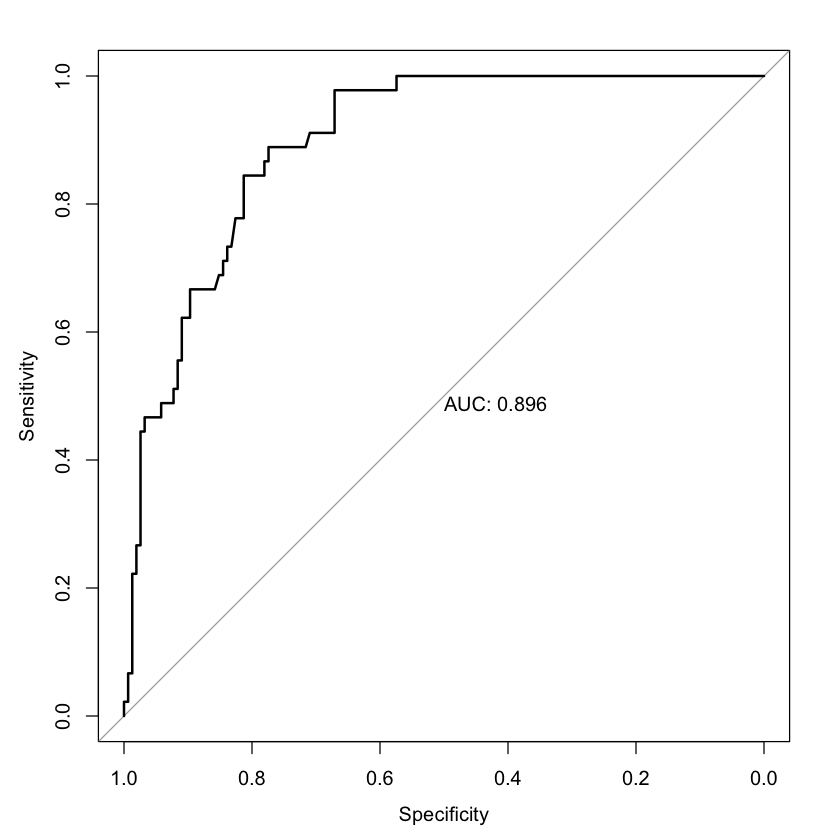

In [37]:
library(pROC)
test_prob=predict(after_stepwise_model, type = "response",newdata = test.data)
test_roc = roc(test.data$salary ~ test_prob, plot = TRUE, print.auc = TRUE)

num <- as.numeric(test_roc$auc)
num

In [38]:
#Neural Network
library(tidyverse)
library(nnet)
library(GGally)
library(caret)

table(data$salary)
tr_control_for_class <- trainControl(method = "repeatedcv", number = 10, repeats = 5, classProbs = T, summaryFunction = twoClassSummary, savePredictions = T,verboseIter = FALSE,sampling = "smote")

nnetGrid <- expand.grid(size = seq(1,20,4),decay = seq(0.1,0.5,0.1))
train1 <- train.data
train1$salary <- make.names(train1$salary, unique = TRUE)
#nn_model_class <- train(make.names(salary) ~., data = train.data,method = "nnet", metric = "ROC",trControl =tr_control_for_class, tuneGrid = nnetGrid, verbose = F, savePredictions = T)
#set.seed(123)
#levels(train.data$salary) <- c("0", "1")
#str(train.data)
#train.data$salary <- ifelse(train.data$salary, 0, "<=50K",">50K")


###since ıteration is too long, please remove the comment and run again.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ randomForest::combine() masks dplyr::combine()
✖ dplyr::filter()         masks stats::filter()
✖ stringr::fixed()        masks recipes::fixed()
✖ dplyr::lag()            masks stats::lag()
✖ purrr::lift()           masks caret::lift()
✖ randomForest::margin()  masks ggplot2::margin()
✖ car::recode()           masks dplyr::recode()
✖ purrr::some()           masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2




<=50K  >50K 
24720  7841 

In [39]:
nn_t <- predict(nn_model_class, newdata = test.data)
#true_labels <- as.factor(test.data$salary)
#nn_t <- ifelse(nn_t == "X0", 0 , 1)
#confusion_matrix_nn <- caret::confusionMatrix(as.factor(nn_t), true_labels)
#confusion_matrix_nn

nn_t_test_predict <- predict(nn_model_class, newdata= test.data)
nn_t_test_predict <- as.factor(ifelse(nn_t_test_predict=="X0",0,1))
test_tab_nn = table(predicted = nn_t_test_predict, actual = test.data$salary)
test_con_mat_nn = caret::confusionMatrix(test_tab_nn,mode = "everything" ,positive = "0")
c(test_con_mat_nn$overall["Accuracy"], 
  test_con_mat_nn$byClass["Sensitivity"], 
  test_con_mat_nn$byClass["Specificity"])
####Accuracy Sensitivity Specificity  #F1 : 
 # 0.8550000   0.8516129   0.8666667   0.9010

nn_t_train_predict <- predict(nn_model_class, newdata = train.data)
nn_t_train_predict <- as.factor(ifelse(nn_t_train_predict=="X0",0,1))
train_tab_nn <- table(predicted = nn_t_train_predict, actual = as.factor(train.data$salary))
train_con_mat_nn = caret::confusionMatrix(train_tab_nn,mode = "everything" ,positive = "0")
c(train_con_mat_nn$overall["Accuracy"], 
  train_con_mat_nn$byClass["Sensitivity"], 
  train_con_mat_nn$byClass["Specificity"]) 
# Accuracy Sensitivity Specificity     #F1:
 # 0.8087500   0.8029557   0.8272251    0.8647

Accuracy Sensitivity Specificity 
  0.8550000   0.8516129   0.8666667

Accuracy Sensitivity Specificity 
  0.8087500   0.8029557   0.8272251

In [40]:
nn_model_class

Neural Network 

800 samples
 21 predictor
  2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 719, 720, 721, 720, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  size  decay  ROC        Sens       Spec     
   1    0.1    0.7291641  0.8369617  0.5401579
   1    0.2    0.6896527  0.8935410  0.4494211
   1    0.3    0.7156898  0.8500820  0.5341053
   1    0.4    0.7231695  0.8705847  0.4992632
   1    0.5    0.7119080  0.8750984  0.5163158
   5    0.1    0.8612980  0.7878142  0.7483158
   5    0.2    0.8658930  0.7868470  0.7694211
   5    0.3    0.8701106  0.7832459  0.7747895
   5    0.4    0.8733053  0.7819235  0.7715789
   5    0.5    0.8510037  0.8015738  0.7211053
   9    0.1    0.8641199  0.7851858  0.7683684
   9    0.2    0.8647679  0.7799454  0.7640526
   9    0.3    0.8716192  0.7753115  0.7737368
   9    0.4    0.8702515  0.7707541  0.7788421
   9    0.5  

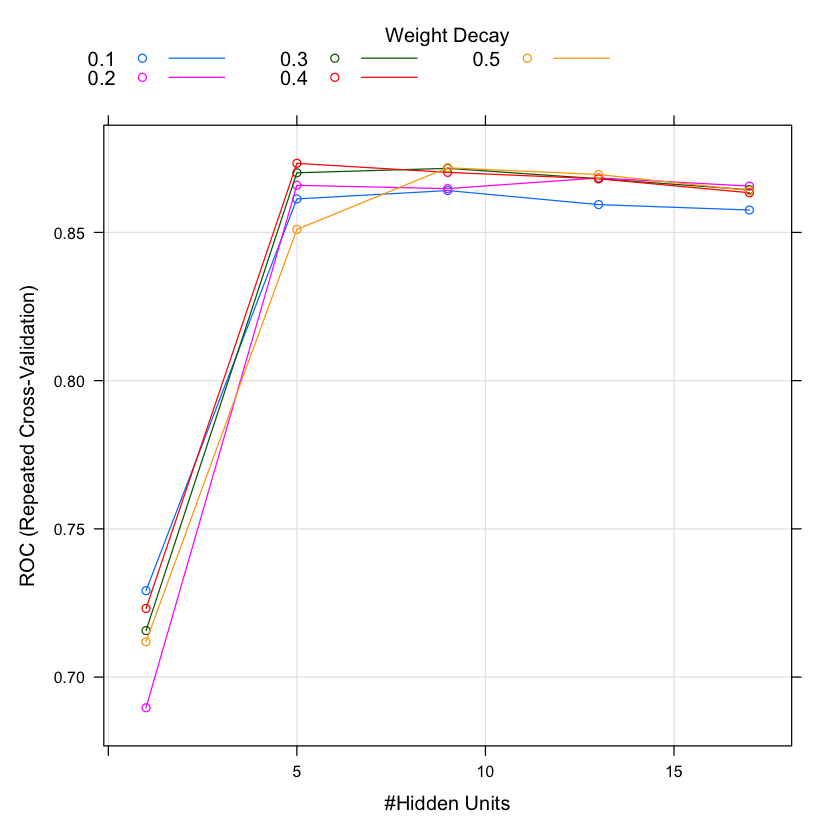

In [41]:
plot(nn_model_class)

In [42]:
nn_model_class$finalModel

a 21-5-1 network with 116 weights
inputs: education.7th.8th education.Bachelors education.Doctorate education.HS.grad education.Prof.school occupation.Executive occupation.Farming occupation.Other.service occupation.Professionals occupation.Sales occupation.Transportation relationship.Husband relationship.Not.in.family relationship.Own.child relationship.Unmarried age hours.per.week capital.gain capital.loss marital.statusSingle sexMale 
output(s): .outcome 
options were - entropy fitting  decay=0.4

ℹ SHA-1 hash of file is "74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef"
Zorunlu paket yükleniyor: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Zorunlu paket yükleniyor: reshape


Attaching package: ‘reshape’


The following object is masked from ‘package:lubridate’:

    stamp


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




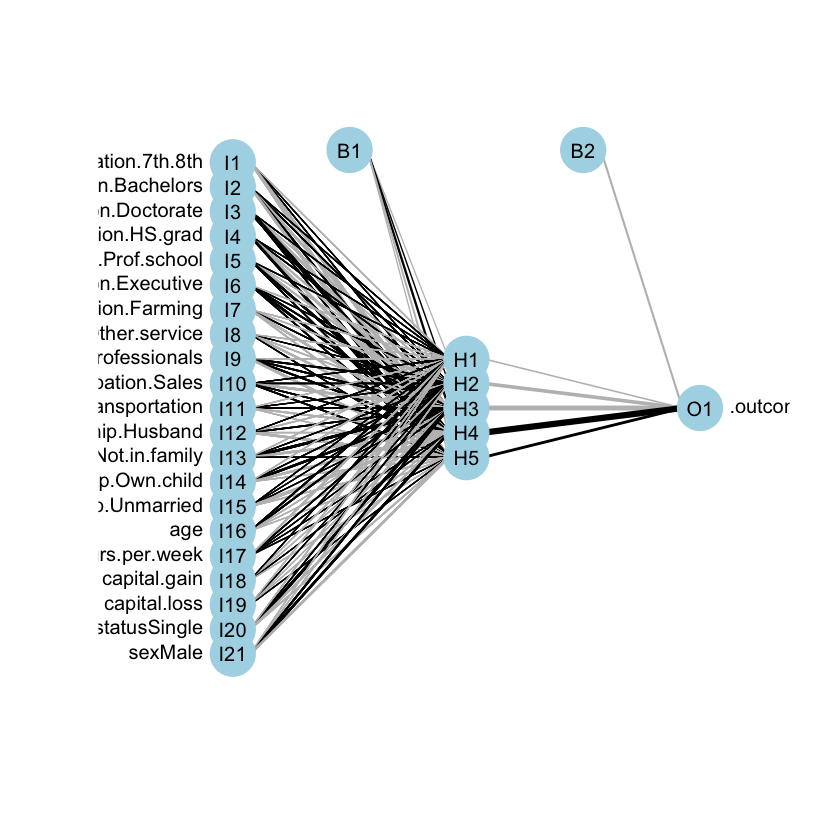

In [43]:
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
plot.nnet(nn_model_class$finalModel)

In [67]:
###SUPPORT VECTOR MACHINE
set.seed(120)
#tr_control<-trainControl(method = "repeatedcv", number =10,repeats = 5,sampling = "smote",
#classProbs = T, summaryFunction = twoClassSummary, savePredictions = T,search = "random")
train.control_k2 <- trainControl(method = "repeatedcv", number = 10, repeats=5, sampling = "smote")

train2 <- train.data
train2$salary <- make.names(train2$salary, unique = TRUE)
svm_model <- train(salary ~ ., data = train.data, method = "svmRadial", preProc =  c("center", "scale"), trControl = train.control_k2,  family="binomial")

In [68]:
svm_model
svm_model$bestTune
svm_model$finalModel

Support Vector Machines with Radial Basis Function Kernel 

800 samples
 21 predictor
  2 classes: '0', '1' 

Pre-processing: centered (21), scaled (21) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 719, ... 
Addtional sampling using SMOTE prior to pre-processing

Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7595354  0.4397021
  0.50  0.7732793  0.4556720
  1.00  0.7840361  0.4699035

Tuning parameter 'sigma' was held constant at a value of 0.04290062
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04290062 and C = 1.

,sigma,C
,<dbl>,<dbl>
3,0.04290062,1


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0429006188578837 

Number of Support Vectors : 544 

Objective Function Value : -415.9544 
Training error : 0.126437 

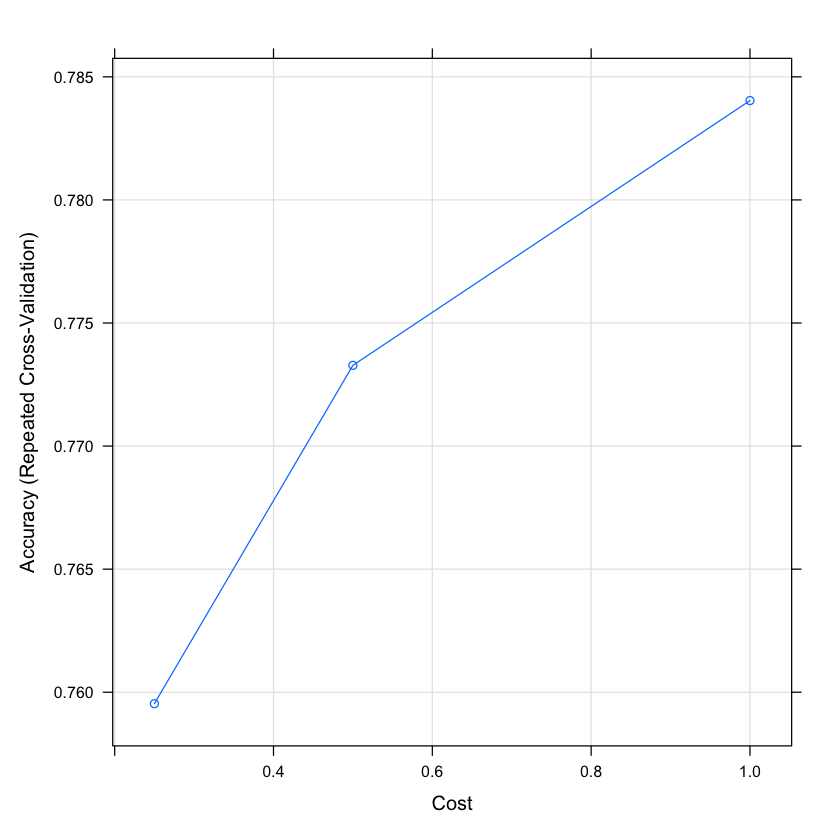

In [69]:
plot(svm_model)

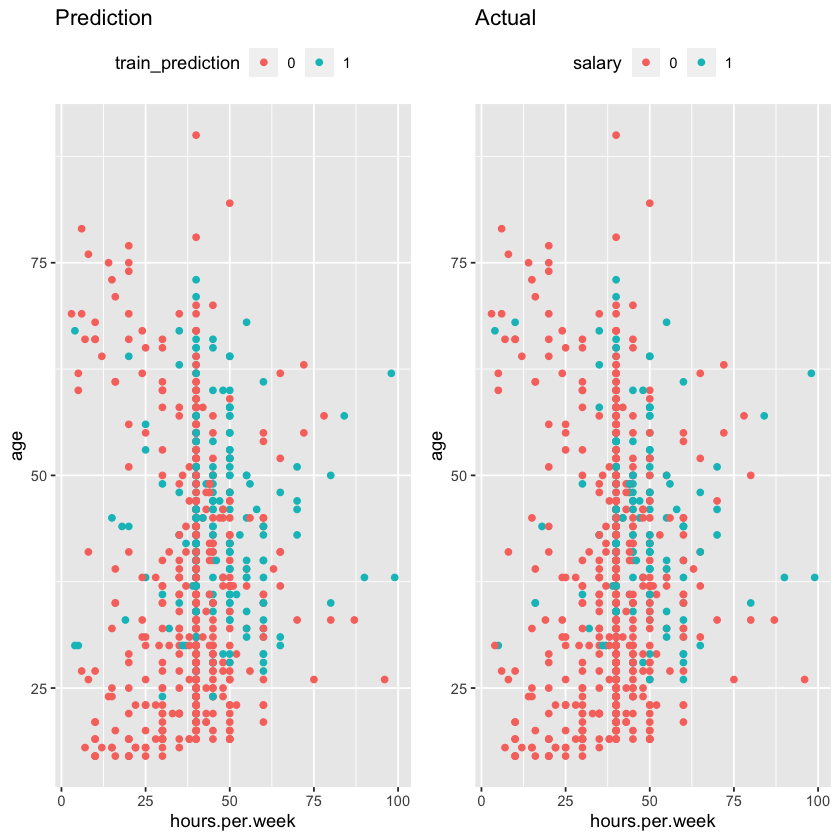

In [70]:
train_prediction<-predict(svm_model,train.data)
train.data_with_prediction<-cbind(train.data,train_prediction)
p1<-ggplot(train.data_with_prediction,aes(hours.per.week,age,color = train_prediction))+geom_point()+labs(title ="Prediction")+theme(legend.position = "top")
p2<-ggplot(train.data_with_prediction,aes(hours.per.week,age,color = salary))+geom_point()+labs(title ="Actual")+theme(legend.position = "top")
grid.arrange(p1,p2,ncol = 2)

In [71]:
svm_var_imp<-varImp(svm_model, scale = FALSE)
svm_var_imp

ROC curve variable importance

  only 20 most important variables shown (out of 21)

                           Importance
marital.status                 0.7501
relationship.Husband           0.7341
hours.per.week                 0.6705
age                            0.6652
relationship.Not.in.family     0.6218
sex                            0.6190
education.HS.grad              0.5927
education.Bachelors            0.5871
occupation.Executive           0.5859
relationship.Own.child         0.5833
capital.gain                   0.5828
occupation.Professionals       0.5597
occupation.Other.service       0.5526
relationship.Unmarried         0.5436
capital.loss                   0.5379
education.Prof.school          0.5263
education.Doctorate            0.5262
occupation.Transportation      0.5186
occupation.Sales               0.5152
education.7th.8th              0.5113

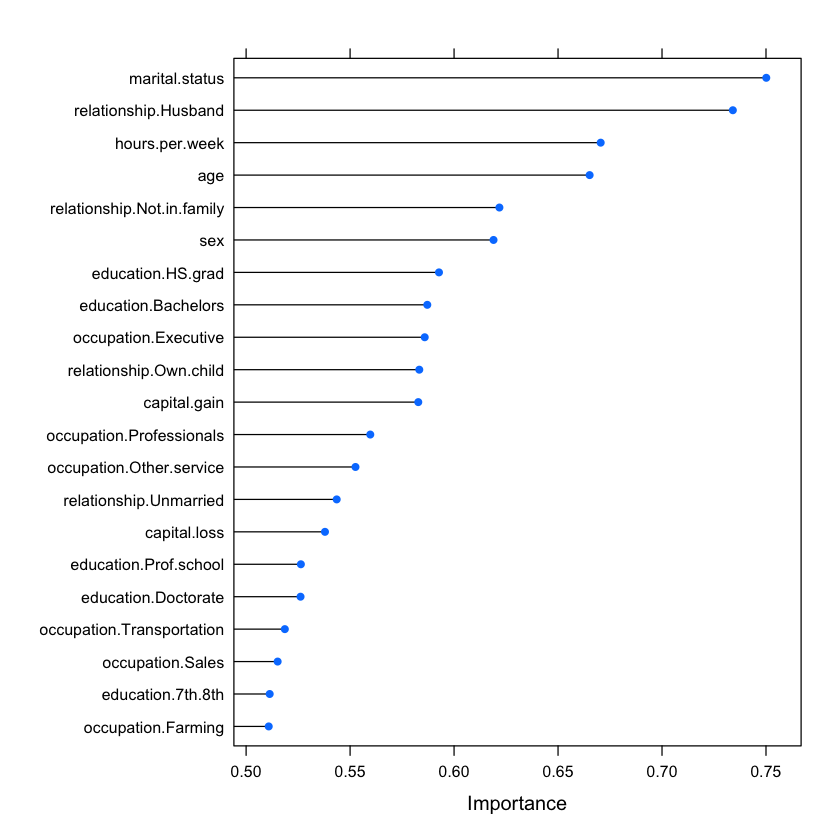

In [72]:
plot(svm_var_imp)

In [73]:
svm_t <- predict(svm_model, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_k.20 <- caret::confusionMatrix(svm_t,mode = "everything" ,true_labels)
confusion_matrix_k.20


svm_test_predict <- predict(svm_model, newdata= test.data)
test_tab_svm = table(predicted = svm_test_predict, actual = test.data$salary)
test_con_mat_svm = caret::confusionMatrix(test_tab_svm,mode = "everything", positive = "0")
c(test_con_mat_svm$overall["Accuracy"], 
  test_con_mat_svm$byClass["Sensitivity"], 
  test_con_mat_svm$byClass["Specificity"])


svm_train_predict <- predict(svm_model, newdata = train.data)
train_tab_rf <- table(predicted = svm_train_predict, actual = as.factor(train.data$salary))
train_con_mat_svm = caret::confusionMatrix(train_tab_rf,mode = "everything" ,positive = "0")
c(train_con_mat_svm$overall["Accuracy"], 
  train_con_mat_svm$byClass["Sensitivity"], 
  train_con_mat_svm$byClass["Specificity"]) 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 130   9
         1  25  36
                                          
               Accuracy : 0.83            
                 95% CI : (0.7706, 0.8793)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.03463         
                                          
                  Kappa : 0.5672          
                                          
 Mcnemar's Test P-Value : 0.01010         
                                          
            Sensitivity : 0.8387          
            Specificity : 0.8000          
         Pos Pred Value : 0.9353          
         Neg Pred Value : 0.5902          
              Precision : 0.9353          
                 Recall : 0.8387          
                     F1 : 0.8844          
             Prevalence : 0.7750          
         Detection Rate : 0.6500          
   Detection Prevalence : 0.6950          
      Balanced Accuracy : 0.81

Accuracy Sensitivity Specificity 
  0.8300000   0.8387097   0.8000000

Accuracy Sensitivity Specificity 
  0.8287500   0.8308703   0.8219895

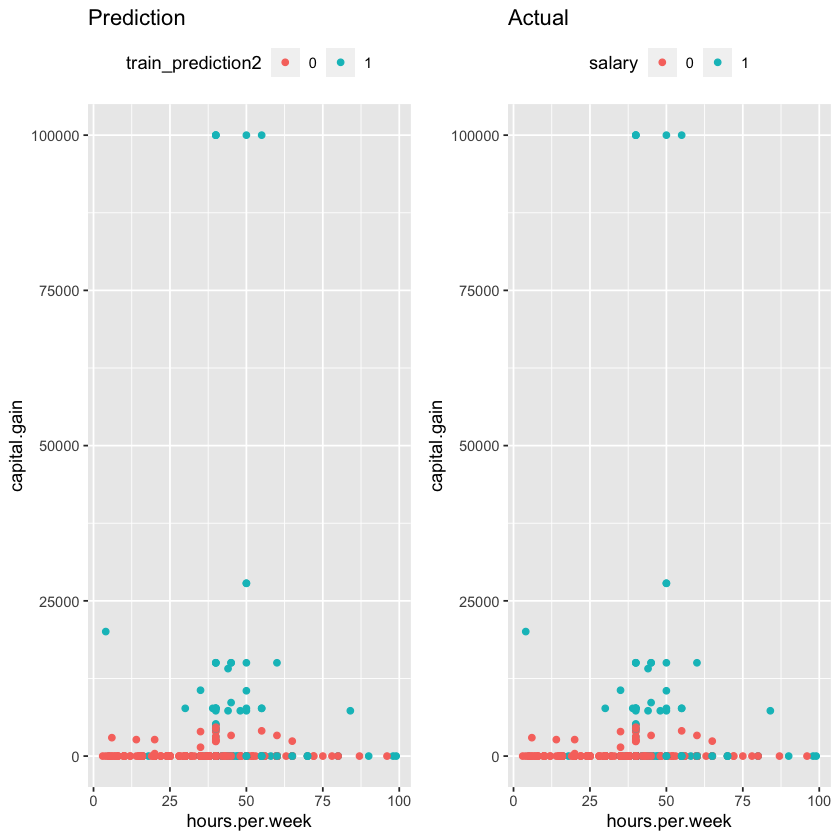

In [74]:
##Decision Tree
set.seed(120)
library(rpart)
library(e1071)
library(gridExtra)

tr_ctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 5,sampling = "smote")
train22 <- train.data
train22$salary <- make.names(train22$salary, unique = TRUE)
dt_model <- train(salary ~.,  data =train.data, method = "treebag",preProc =  c("center", "scale") ,trControl = tr_ctrl, family="binomial")


train_prediction2<-predict(dt_model,train.data)
train.data_with_prediction2<-cbind(train.data,train_prediction2)
p1<-ggplot(train.data_with_prediction2,aes(hours.per.week,capital.gain,color = train_prediction2))+geom_point()+labs(title ="Prediction")+theme(legend.position = "top")
p2<-ggplot(train.data_with_prediction2,aes(hours.per.week,capital.gain,color = salary))+geom_point()+labs(title ="Actual")+theme(legend.position = "top")
grid.arrange(p1,p2,ncol = 2)

In [75]:
dt_test_predict <- predict(dt_model, newdata= test.data)
test_tab_dt = table(predicted = dt_test_predict, actual = test.data$salary)
test_con_mat_dt = caret::confusionMatrix(test_tab_dt,mode = "everything" ,positive = "0")
c(test_con_mat_dt$overall["Accuracy"], 
  test_con_mat_dt$byClass["Sensitivity"], 
  test_con_mat_dt$byClass["Specificity"])


dt_train_predict <- predict(dt_model, newdata = train.data)
train_tab_dt <- table(predicted = dt_train_predict, actual = as.factor(train.data$salary))
train_con_mat_dt = caret::confusionMatrix(train_tab_dt,mode = "everything" ,positive = "0")
c(train_con_mat_dt$overall["Accuracy"], 
  train_con_mat_dt$byClass["Sensitivity"], 
  train_con_mat_dt$byClass["Specificity"]) 


Accuracy Sensitivity Specificity 
  0.8150000   0.9032258   0.5111111

Accuracy Sensitivity Specificity 
  0.9837500   0.9917898   0.9581152

In [76]:
dt_model

Bagged CART 

800 samples
 21 predictor
  2 classes: '0', '1' 

Pre-processing: centered (21), scaled (21) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 719, ... 
Addtional sampling using SMOTE prior to pre-processing

Resampling results:

  Accuracy   Kappa    
  0.7970044  0.4402038


In [77]:
dt_model$finalModel


Bagging classification trees with 25 bootstrap replications 


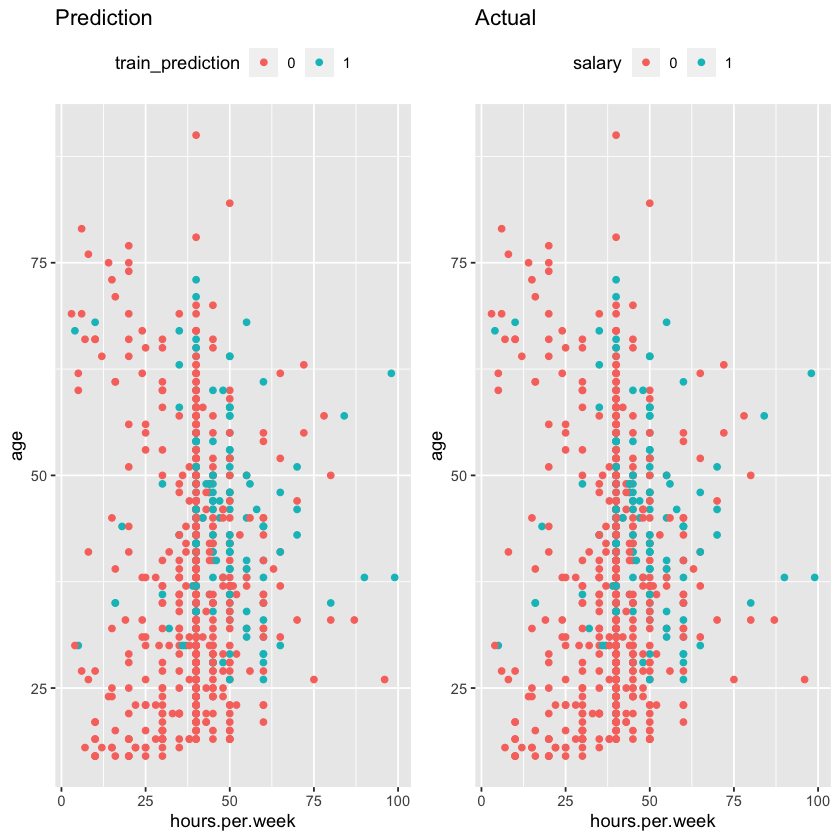

In [78]:
library(ggplot2)
library(gridExtra)
train_prediction<-predict(dt_model,train.data)
train.data_with_prediction<-cbind(train.data,train_prediction)
p1<-ggplot(train.data_with_prediction,aes(hours.per.week,age,color = train_prediction))+geom_point()+labs(title ="Prediction")+theme(legend.position = "top")
p2<-ggplot(train.data_with_prediction,aes(hours.per.week,age,color = salary))+geom_point()+labs(title ="Actual")+theme(legend.position = "top")
grid.arrange(p1,p2,ncol = 2)

In [79]:
dt_test_predict<-predict(dt_model, newdata= test.data)
head(dt_test_predict)

[1] 0 0 1 0 0 0
Levels: 0 1

In [80]:
#####RANDOM FOREST
mtry_grid <- expand.grid(.mtry = seq(100,120,2)) 
set.seed(123)
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




In [81]:
train.control_k4 <- trainControl(method = "repeatedcv", number = 10, repeats=5, sampling = "smote")

train4 <- train.data
train4$salary <- make.names(train4$salary, unique = TRUE)
model_rf_ <- caret::train(salary ~ ., data = train.data,
                               method = "rf",
                               preProcess = c("scale", "center"),
                               trControl = train.control_k4, family = "binomial")

rf_t <- predict(model_rf_, newdata = test.data)
true_labels <- as.factor(test.data$salary)
confusion_matrix_k.20 <- caret::confusionMatrix(rf_t, mode = "everything",true_labels)
confusion_matrix_k.20

rf_test_predict <- predict(model_rf_, newdata= test.data)
test_tab = table(predicted = rf_test_predict, actual = test.data$salary)
test_con_mat = caret::confusionMatrix(test_tab,mode = "everything" ,positive = "0")
c(test_con_mat$overall["Accuracy"], 
  test_con_mat$byClass["Sensitivity"], 
  test_con_mat$byClass["Specificity"])
####Accuracy Sensitivity Specificity   F1
  #0.8600000   0.9032   0.7111111  0.9091



rf_train_predict <- predict(model_rf_, newdata = train.data)
train_tab_rf <- table(predicted = rf_train_predict, actual = as.factor(train.data$salary))
train_con_mat = caret::confusionMatrix(train_tab_rf,mode = "everything" ,positive = "0")
c(train_con_mat$overall["Accuracy"], 
  train_con_mat$byClass["Sensitivity"], 
  train_con_mat$byClass["Specificity"]) 
#Accuracy Sensitivity Specificity  #F1 
#0.8637500   0.8998358   0.7329843 0.9073

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 140  13
         1  15  32
                                          
               Accuracy : 0.86            
                 95% CI : (0.8041, 0.9049)
    No Information Rate : 0.775           
    P-Value [Acc > NIR] : 0.00172         
                                          
                  Kappa : 0.6048          
                                          
 Mcnemar's Test P-Value : 0.85011         
                                          
            Sensitivity : 0.9032          
            Specificity : 0.7111          
         Pos Pred Value : 0.9150          
         Neg Pred Value : 0.6809          
              Precision : 0.9150          
                 Recall : 0.9032          
                     F1 : 0.9091          
             Prevalence : 0.7750          
         Detection Rate : 0.7000          
   Detection Prevalence : 0.7650          
      Balanced Accuracy : 0.80

Accuracy Sensitivity Specificity 
  0.8600000   0.9032258   0.7111111

Accuracy Sensitivity Specificity 
  0.8600000   0.8998358   0.7329843

In [82]:
model_rf_
model_rf_$finalModel

Random Forest 

800 samples
 21 predictor
  2 classes: '0', '1' 

Pre-processing: scaled (21), centered (21) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 720, 719, 720, 720, 720, 720, ... 
Addtional sampling using SMOTE prior to pre-processing

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8222549  0.5072242
  11    0.8187236  0.4733134
  21    0.8072233  0.4529676

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = param$mtry, family = "binomial") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 12.4%
Confusion matrix:
    0   1 class.error
0 537  72   0.1182266
1  79 530   0.1297209

In [83]:
rf_var_imp<-varImp(model_rf_, scale = FALSE)
rf_var_imp

rf variable importance

  only 20 most important variables shown (out of 21)

                           Overall
relationship.Husband        64.910
marital.statusSingle        63.626
age                         34.515
education.HS.grad           30.656
sexMale                     25.391
hours.per.week              25.044
occupation.Executive        24.985
relationship.Not.in.family  23.150
education.Bachelors         21.011
capital.gain                18.357
occupation.Professionals    14.177
relationship.Own.child       9.992
occupation.Transportation    7.477
occupation.Sales             6.693
occupation.Other.service     6.050
education.Doctorate          5.629
relationship.Unmarried       5.589
capital.loss                 5.015
education.Prof.school        4.787
occupation.Farming           4.019

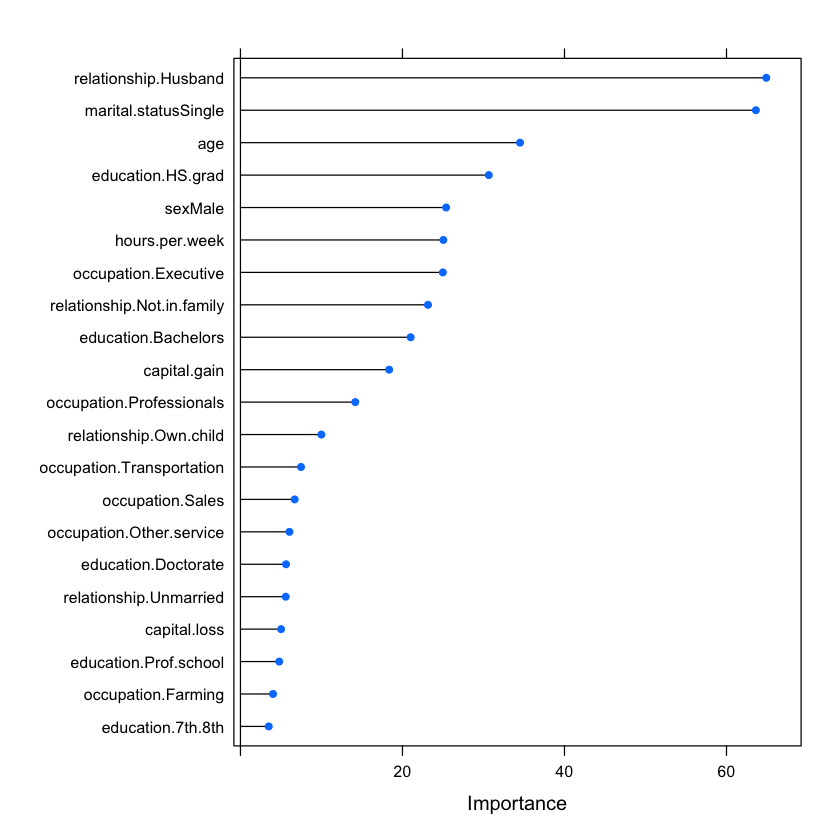

In [84]:
plot(rf_var_imp)

In [45]:
####XGBOOST
library(xgboost)
set.seed(120)
tune.gridxgb <- expand.grid(eta = c(0.05,0.3, 0.075), # 3 
                            nrounds = c(50, 75, 100),  # 3
                            max_depth = 4:7,  # 4
                            min_child_weight = c(2.0, 2.25), #2 
                            colsample_bytree = c(0.3, 0.4, 0.5), # 3
                            gamma = 0, #1
                            subsample = 1)  # 1

train.control_k5 <- trainControl(method = "repeatedcv", 
                                 number = 10, repeats=5, 
                                 classProbs = TRUE,
                                 sampling = "smote",
                                 summaryFunction = twoClassSummary, 
                                 savePredictions = T)
xgb_model <-train(make.names(salary) ~.,  data =train.data, 
                  method = "xgbTree",  
                  metric = "ROC",
                  preProc =  c("center", "scale"),
                  verbosity = 0,
                  trControl = train.control_k5,tunegrid = tune.gridxgb)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [46]:
xgb_test_predict <- predict(xgb_model, newdata= test.data)
xgb_test_predict <- as.factor(ifelse(xgb_test_predict=="X0",0,1))
test_tab_xg = table(predicted = xgb_test_predict, actual = test.data$salary)
test_con_mat_xgb = caret::confusionMatrix(test_tab_xg,mode = "everything" ,positive = "0")
c(test_con_mat_xgb$overall["Accuracy"], 
  test_con_mat_xgb$byClass["Sensitivity"], 
  test_con_mat_xgb$byClass["Specificity"])
####Accuracy Sensitivity Specificity  #F1
 # 0.8650000   0.9032258   0.7333333   0.9121


xgb_train_predict <- predict(xgb_model, newdata = train.data)
xgb_train_predict <- as.factor(ifelse(xgb_train_predict=="X0",0,1))
train_tab_xg = table(predicted = xgb_train_predict, actual = train.data$salary)
train_con_mat_xgb = caret::confusionMatrix(train_tab_xg,mode = "everything" ,positive = "0")
c(train_con_mat_xgb$overall["Accuracy"], 
  train_con_mat_xgb$byClass["Sensitivity"], 
  train_con_mat_xgb$byClass["Specificity"]) 
#Accuracy Sensitivity Specificity   #F1
#0.8500000   0.8834154   0.7434555  0.8997

Accuracy Sensitivity Specificity 
  0.8650000   0.9032258   0.7333333

Accuracy Sensitivity Specificity 
  0.8500000   0.8834154   0.7434555

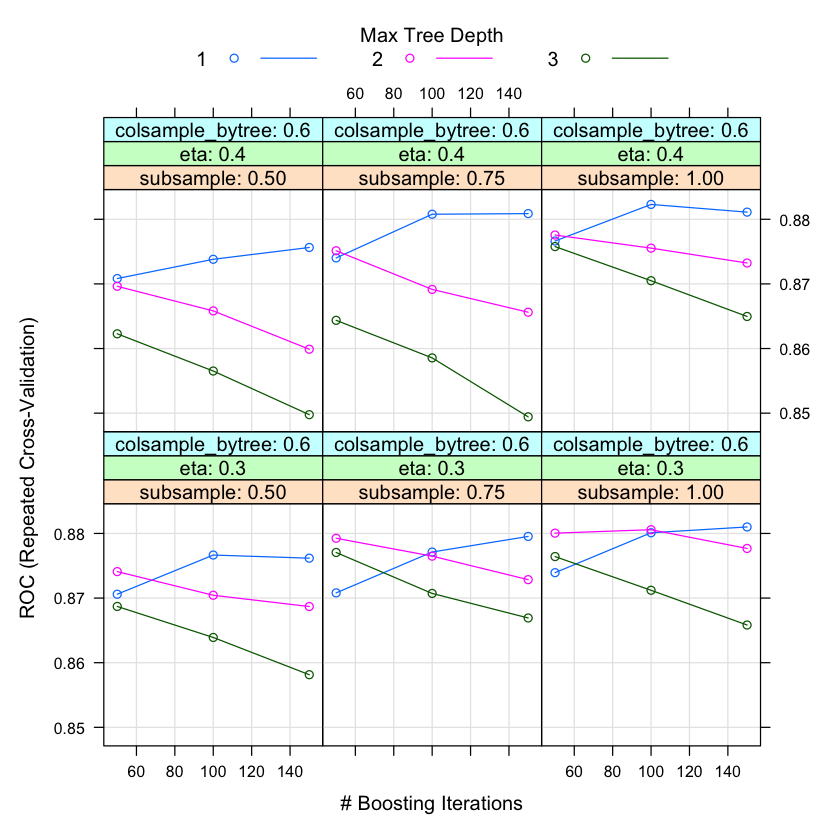

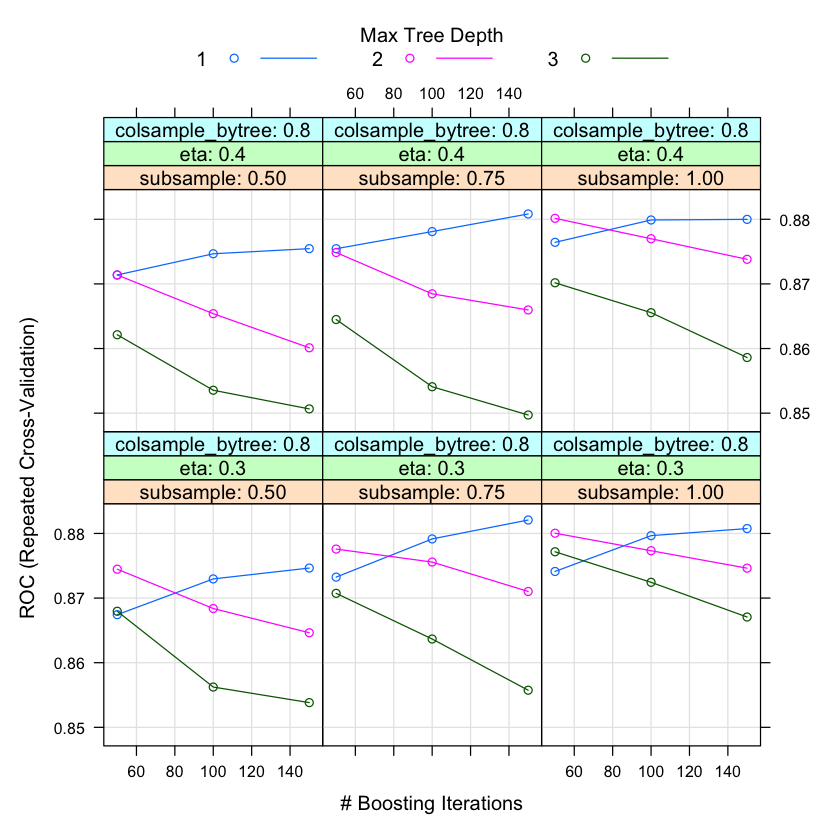

In [47]:
plot(xgb_model)

In [48]:
xgb_var_imp<-varImp(xgb_model, scale = FALSE)
xgb_var_imp

xgbTree variable importance

  only 20 most important variables shown (out of 21)

                            Overall
relationship.Husband       0.228265
marital.statusSingle       0.194278
age                        0.113574
education.HS.grad          0.091170
capital.gain               0.083484
occupation.Executive       0.077844
education.Bachelors        0.043856
hours.per.week             0.042849
education.Doctorate        0.026674
occupation.Sales           0.015426
sexMale                    0.014126
occupation.Professionals   0.013641
occupation.Transportation  0.013010
capital.loss               0.011702
education.Prof.school      0.011240
occupation.Farming         0.009408
education.7th.8th          0.004829
occupation.Other.service   0.003643
relationship.Not.in.family 0.000983
relationship.Unmarried     0.000000

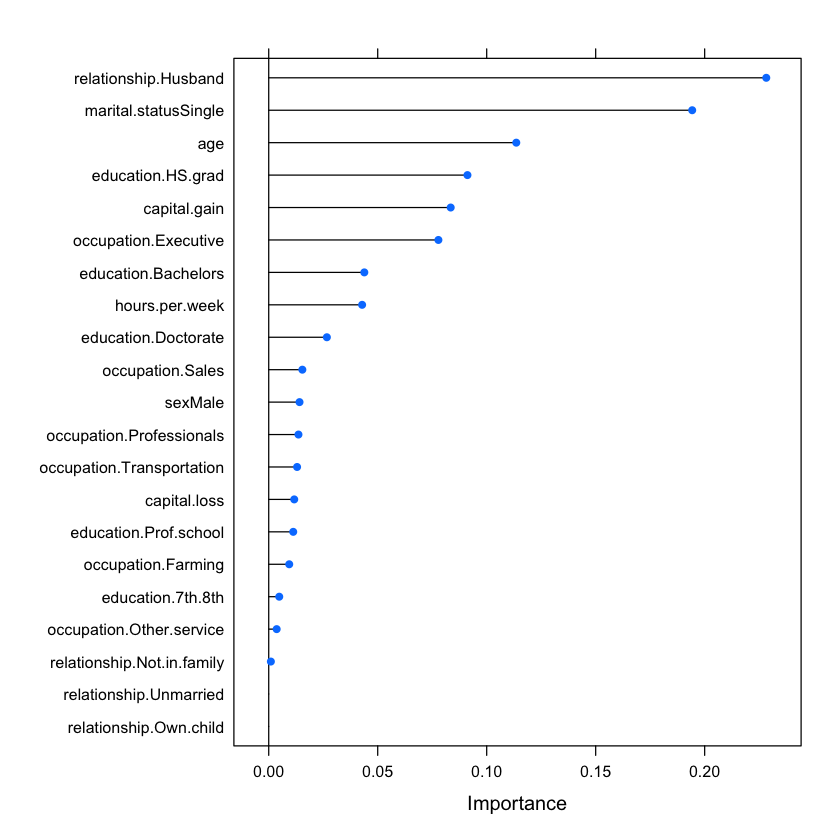

In [49]:
plot(xgb_var_imp)